## Lista De Exercícios

Grupo:
- Gregory Filipe Lira da Silva
- Danilo Henrique da Silva Santana
- Dayvison Gomes de Oliveira

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler


from Perceptron_ import *
from nn import *

sns.set_style('whitegrid')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import np_utils

from Perceptron_ import *
from nn import *

sns.set_style('whitegrid')

## Questão 01

1) A representação de uma determinada mensagem digital ternária, isto é formada por três bits,
forma um cubo cujos vértices correspondem a mesma representação digital. Supondo que ao
transmitirmos esta mensagem a mesma possa ser contaminada por ruído formado em torno de
cada vértice uma nuvem esférica de valores aleatórios com raio máximo é 0.1. Formule este
problema como um problema de classificação de padrões e treine uma Rede Perceptron de
Rosenblatt (Perceptron de camada única) para atuar como classificador/decodificador. Para
solução do problema defina antes um conjunto de treinamento e um conjunto de validação

In [ ]:
dados = np.array([[0,0,0],
                 [0,0,1],
                 [0,1,0],
                 [0,1,1],
                 [1,0,0],
                 [1,0,1],
                 [1,1,0],
                 [1,1,1]])

dados.shape

(8, 3)

In [ ]:
classes = np.array( [i for i in range(8)] ).T

In [ ]:
dados = np.column_stack((dados,classes))

dados

array([[0, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 2],
       [0, 1, 1, 3],
       [1, 0, 0, 4],
       [1, 0, 1, 5],
       [1, 1, 0, 6],
       [1, 1, 1, 7]])

In [ ]:
df = pd.DataFrame(dados, columns=['One','Two','Three','Class'])

df

,One,Two,Three,Class
0,0,0,0,0
1,0,0,1,1
2,0,1,0,2
3,0,1,1,3
4,1,0,0,4
5,1,0,1,5
6,1,1,0,6
7,1,1,1,7


In [ ]:
def create_new_df(df, number_new_dados):
    new_df = df.copy()
    values = new_df[['One','Two','Three']].values

    for passo in range(number_new_dados):

        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(24)]).reshape(8,3)

        new_values = values + ruido

        for i in range(len(new_values)):
            new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],new_values[i][2],i]

    return new_df

In [ ]:
new_df = create_new_df(df, 500)
new_df = new_df.sort_values(by=['Class'])
new_df

,One,Two,Three,Class
0,0.000000,0.000000,0.000000,0.0
2960,-0.010038,-0.094023,0.071368,0.0
840,-0.055161,-0.007782,-0.006545,0.0
2952,0.017210,0.020477,-0.006850,0.0
848,0.000320,-0.054151,0.017764,0.0
...,...,...,...,...
2599,1.084182,0.952437,0.985466,7.0
1127,1.074972,1.009025,0.997549,7.0
2591,0.944529,1.008601,1.075278,7.0
2615,0.912905,1.010393,0.944183,7.0


In [ ]:
new_df['Class'].value_counts()

7.0    501
6.0    501
5.0    501
4.0    501
3.0    501
2.0    501
1.0    501
0.0    501
Name: Class, dtype: int64

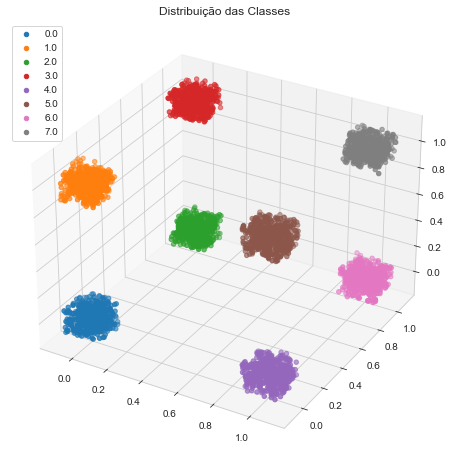

In [ ]:
def plot3d(df):

    classes = df['Class'].unique()

    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')

    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y,z = valores[:,0] , valores[:,1], valores[:,2]
        ax.scatter(x,y,z, label=classe)

    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")

plot3d(new_df)

In [ ]:
X = new_df[['One','Two','Three']].values
y = new_df[['Class']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)
X_train.shape , X_test.shape

((2805, 3), (1203, 3))

### Perceptron Sklearn

In [ ]:
model = Perceptron()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       142
         1.0       1.00      1.00      1.00       158
         2.0       1.00      1.00      1.00       150
         3.0       1.00      1.00      1.00       143
         4.0       1.00      1.00      1.00       148
         5.0       1.00      1.00      1.00       149
         6.0       1.00      1.00      1.00       159
         7.0       1.00      1.00      1.00       154

    accuracy                           1.00      1203
   macro avg       1.00      1.00      1.00      1203
weighted avg       1.00      1.00      1.00      1203

Matriz de confusão: 

[[142   0   0   0   0   0   0   0]
 [  0 158   0   0   0   0   0   0]
 [  0   0 150   0   0   0   0   0]
 [  0   0   0 143   0   0   0   0]
 [  0   0   0   0 148   0   0   0]
 [  0   0   0   0   0 149   0   0]
 [  0   0   0   0   0   0 159   0]
 [  0   0   0   0   0   0   0 154]]


### Implementação - Perceptron

In [ ]:
dim_entrada = X.shape[1]
dim_saida = 8

model = Perceptron_(dim_entrada,dim_saida,ini_pesos=random_normal, learning_rate=1e-3)
model.fit(X_train,y_train, epochs=200, verbose=100)
y_pred = model.predict(X_test)

epoch:    0/200 loss_train: 3.62869875
epoch:  100/200 loss_train: 0.61550802
epoch:  200/200 loss_train: 0.66274510


In [ ]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('Matriz de confusão: \n')
print(confusion_matrix(y_test,y_pred))

Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      0.20      0.34       142
         1.0       0.96      1.00      0.98       158
         2.0       0.80      0.99      0.88       150
         3.0       0.91      1.00      0.95       143
         4.0       0.86      1.00      0.92       148
         5.0       0.90      1.00      0.95       149
         6.0       0.96      1.00      0.98       159
         7.0       0.96      0.99      0.97       154

    accuracy                           0.90      1203
   macro avg       0.92      0.90      0.87      1203
weighted avg       0.92      0.90      0.88      1203

Matriz de confusão: 

[[ 29   7  38  15  25  15   6   7]
 [  0 158   0   0   0   0   0   0]
 [  0   0 149   0   0   0   1   0]
 [  0   0   0 143   0   0   0   0]
 [  0   0   0   0 148   0   0   0]
 [  0   0   0   0   0 149   0   0]
 [  0   0   0   0   0   0 159   0]
 [  0   0   0   0   0   2   0 152]]


## Questão 2

2) Implemente uma rede perceptron de múltiplas camadas e utilize-a para aproximar as
funções abaixo. Em seguida, compare os resultados com as curvas exatas. No caso das letras
(b) e (c), apresente também a curva do erro médio de treinamento com relação ao número de
épocas e a curva do erro médio com o conjunto de validação.

    a) a função lógica XOR

    b) f(x) = log10(x), onde 1 ≤ x ≤ 10

    c) f(x) = 10x^5+ 5x^4+ 2x^3– 0.5x^2+ 3x + 2, onde 0 ≤ x ≤ 5


### $a)$A função lógica XOR

In [ ]:
dados = np.array([[0,0],
                  [0,1],
                  [1,0],
                  [1,1]])

saida = np.array([[0,1,1,0]]).T

dados_ = np.column_stack((dados,saida))

In [ ]:
df = pd.DataFrame(dados_, columns=['One','Two','Class'])
df

,One,Two,Class
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


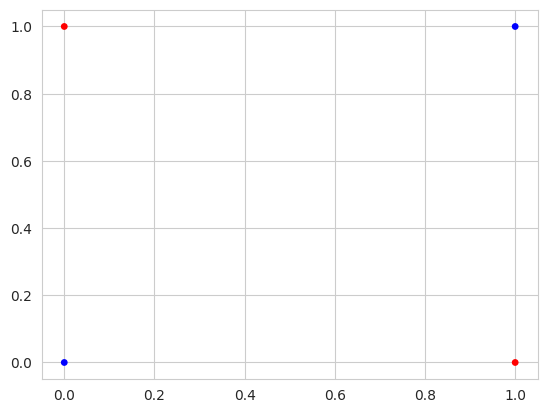

In [ ]:
plt.scatter(dados[:,0],dados[:,1], c=saida, s=15, cmap='bwr')

In [ ]:
def create_new_df_2(df, number_new_dados):
    new_df = df.copy()
    values = new_df[['One','Two']].values

    for passo in range(number_new_dados):

        ruido = np.array([np.random.uniform(-0.3,0.3) for i in range(8)]).reshape(4,2)

        new_values = values + ruido

        for i in range(len(new_values)):
            if i == 2:
                new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],1]
            elif i == 3:
                new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],0]
            else:
                new_df.loc[len(new_df)] = [new_values[i][0],new_values[i][1],i]

    return new_df

In [ ]:
new_df = create_new_df_2(df, 200)

In [ ]:
new_df

,One,Two,Class
0,0.000000,0.000000,0.0
1,0.000000,1.000000,1.0
2,1.000000,0.000000,1.0
3,1.000000,1.000000,0.0
4,-0.055891,-0.175484,0.0
...,...,...,...
799,1.135552,0.873758,0.0
800,-0.160499,-0.280004,0.0
801,0.035864,0.818309,1.0
802,0.834851,-0.268221,1.0


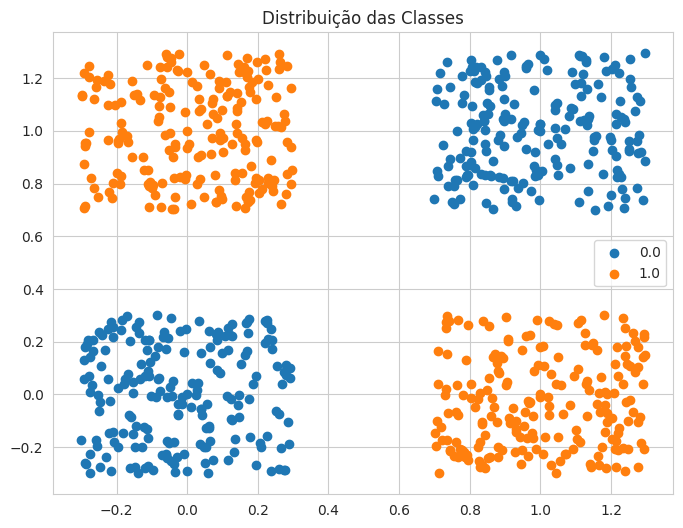

In [ ]:
def plot2d(df):

    classes = df['Class'].unique()

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y = valores[:,0] , valores[:,1]
        ax.scatter(x,y, label=classe)

    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")

plot2d(new_df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_df[['One','Two']].values, new_df['Class'], test_size=0.3)
X_test.shape

(242, 2)

### MLPClassifier Sklearn

In [ ]:
model = MLPClassifier(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       129
         1.0       1.00      1.00      1.00       113

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



<Axes: >

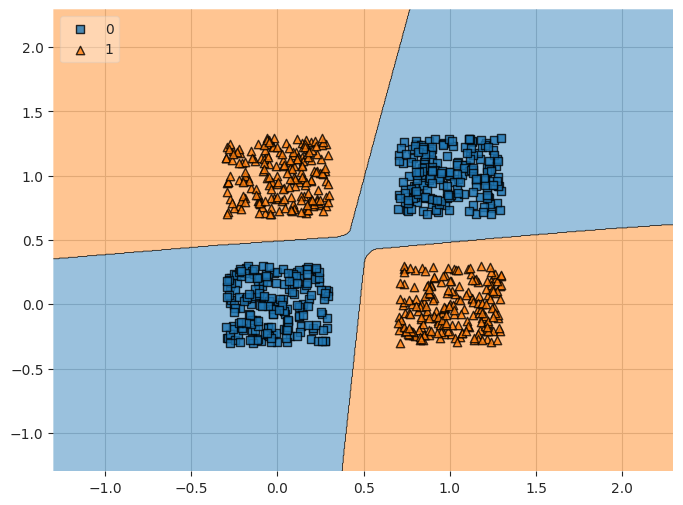

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plot_decision_regions(X=new_df[['One','Two']].values, y=new_df['Class'].ravel().astype(np.int_), clf=model, legend=2)

### Implementação da rede

In [ ]:
y_train = y_train.reshape(-1,1)
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

model = NeuralNetwork(func_cost=cross_entropy, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=relu))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=relu))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=sigmoid))

history = model.fit(X_train,y_train, X_test, y_test.to_numpy().reshape(-1,1), epochs=3000, verbose=300)

y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 0.94641798
epoch:  300/3000 loss_train: 0.00941967
epoch:  600/3000 loss_train: 0.00452412
epoch:  900/3000 loss_train: 0.00286292
epoch: 1200/3000 loss_train: 0.00204136
epoch: 1500/3000 loss_train: 0.00156254
epoch: 1800/3000 loss_train: 0.00125577
epoch: 2100/3000 loss_train: 0.00104435
epoch: 2400/3000 loss_train: 0.00088893
epoch: 2700/3000 loss_train: 0.00077068
epoch: 3000/3000 loss_train: 0.00067938


In [ ]:
for i in range(len(y_pred)):
    if y_pred[i,0] >= 0.5:
        y_pred[i,0] = 1
    else:
        y_pred[i,0] = 0

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       129
         1.0       1.00      1.00      1.00       113

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



<Axes: >

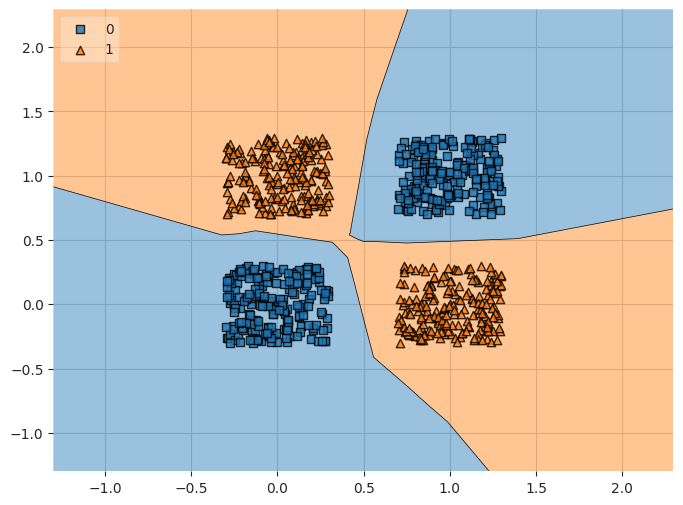

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plot_decision_regions(X=new_df[['One','Two']].values, y=new_df['Class'].ravel().astype(np.int_), clf=model, legend=2)

### $b) f(x) = \log_{10}(x) , 1 \leq x \leq 10$

In [ ]:
x = np.linspace(1,10,200)
f = lambda x: np.log(x)
y = f(x)
y = np.array([y])

In [ ]:
df = pd.DataFrame(data={'x':x,'y':y[0]})
df

,x,y
0,1.000000,0.000000
1,1.045226,0.044233
2,1.090452,0.086593
3,1.135678,0.127230
4,1.180905,0.166281
...,...,...
195,9.819095,2.284329
196,9.864322,2.288924
197,9.909548,2.293499
198,9.954774,2.298052


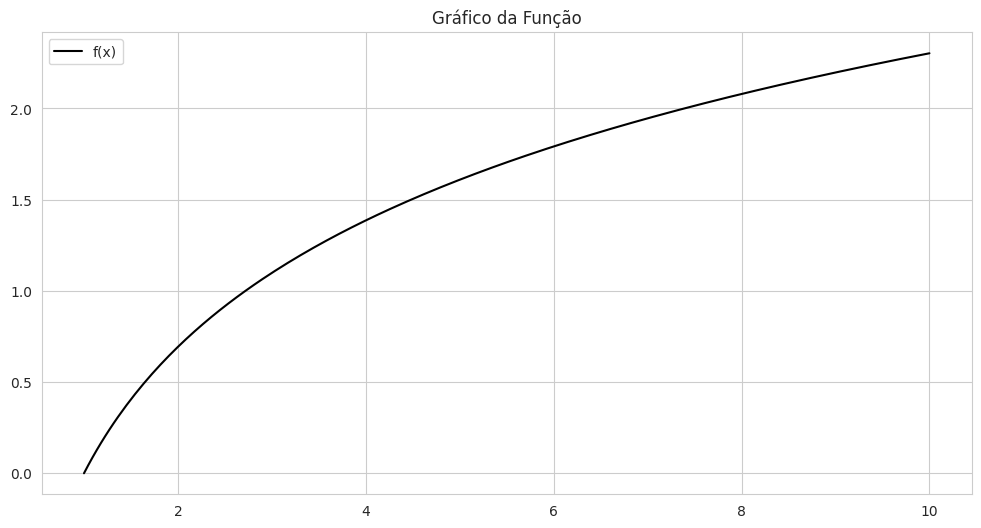

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.set_title('Gráfico da Função')
ax.plot(x,y[0], c='black',label='f(x)')
ax.legend(loc='best')

### Normalização dos dados

In [ ]:
minmax = MinMaxScaler()

X_train, X_test, y_train,y_test = train_test_split(x,y[0], test_size=0.3)
X_train = minmax.fit_transform(X_train.reshape(-1,1))
X_test = minmax.transform(X_test.reshape(-1,1))

X_train.shape

(140, 1)

### Rede Keras

In [ ]:
model_ = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

model_.compile(optimizer='adam',metrics=['mean_squared_error'],loss =['mean_squared_error'] )
history = model_.fit(X_train, y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 3.0384 - mean_squared_error: 3.0384 - val_loss: 2.8568 - val_mean_squared_error: 2.8568
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 2.7284 - mean_squared_error: 2.7284 - val_loss: 2.5652 - val_mean_squared_error: 2.5652
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 2.4474 - mean_squared_error: 2.4474 - val_loss: 2.2944 - val_mean_squared_error: 2.2944
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 2.1845 - mean_squared_error: 2.1845 - val_loss: 2.0438 - val_mean_squared_error: 2.0438
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 1.9476 - mean_squared_error: 1.9476 - val_loss: 1.8116 - val_mean_squared_error: 1.8116
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 1.7186 - mean_squared_error: 1.7186 - val_loss: 1.5997 - val_mean_squared_error: 1.5997
Epoch 7/100
5/5 [=======================

2/2 [==============================] - 0s 5ms/step
MSE: 0.3388057242067523 
MAE: 0.6610951117889968


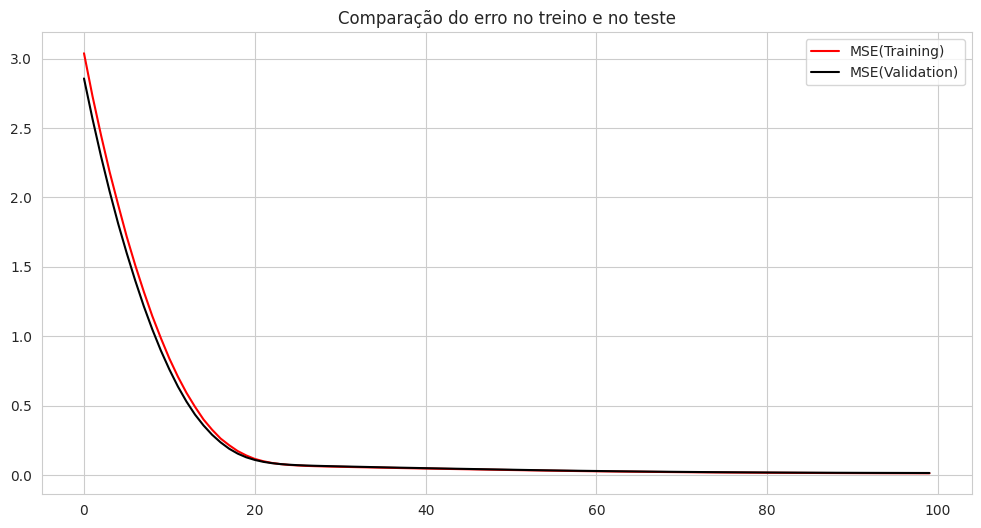

In [ ]:
y_pred_ = model_.predict(X_test)

print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")

plt.figure(figsize=(12,6))
plt.title('Comparação do erro no treino e no teste')
plt.plot(history.history['loss'],color='red',label='MSE(Training)')
plt.plot(history.history['val_loss'],color='black',label='MSE(Validation)')
plt.legend(loc='best')

### MLPRegressor Sklearn

MSE: 0.011630111455176206 
MAE: 0.0894203015691624


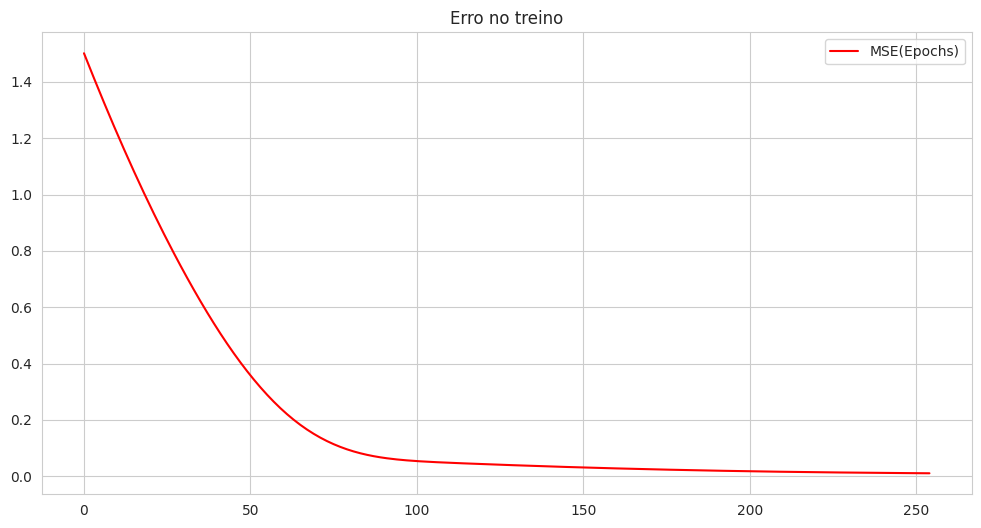

In [ ]:
model__ = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000)
history = model__.fit(X_train,y_train)
y_pred__ = model__.predict(X_test)

print(f"MSE: {0.5*np.mean((y_test-y_pred__)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred__))}")

plt.figure(figsize=(12,6))
plt.title('Erro no treino')
plt.plot(history.loss_curve_,color='red',label='MSE(Epochs)')
plt.legend(loc='best')

### Implementação da rede

In [ ]:
y_train = y_train.reshape(-1,1)
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

model = NeuralNetwork(func_cost=mse, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=tanh ))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=tanh ))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=linear))

history = model.fit(X_train,y_train, X_test, y_test.reshape(-1,1), epochs=3000, verbose=300)
y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 0.23468182
epoch:  300/3000 loss_train: 0.00201923
epoch:  600/3000 loss_train: 0.00081899
epoch:  900/3000 loss_train: 0.00041699
epoch: 1200/3000 loss_train: 0.00024425
epoch: 1500/3000 loss_train: 0.00016008
epoch: 1800/3000 loss_train: 0.00011547
epoch: 2100/3000 loss_train: 0.00009006
epoch: 2400/3000 loss_train: 0.00007454
epoch: 2700/3000 loss_train: 0.00006438
epoch: 3000/3000 loss_train: 0.00005728


MAE: 0.6691251895855
MSE: 0.3618842368113086 


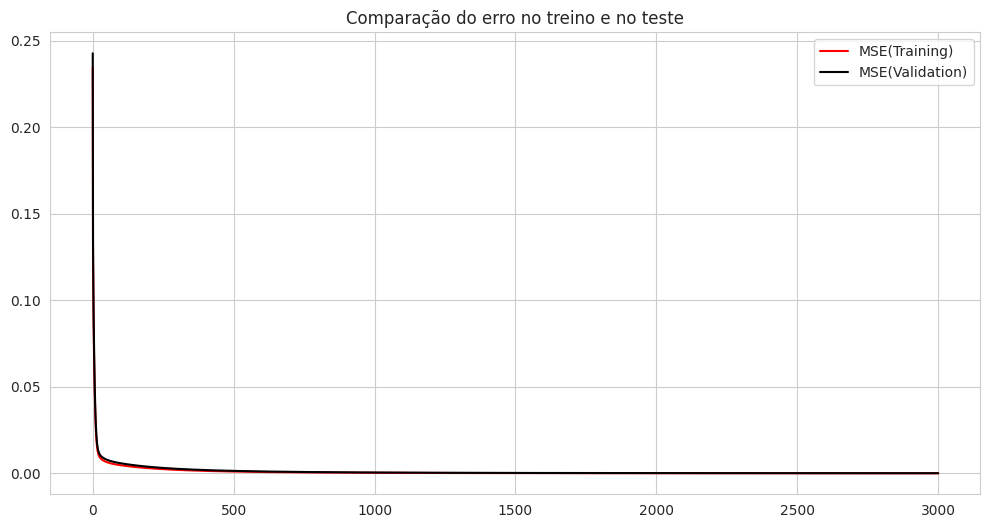

In [ ]:
out = model.predict(x.reshape(-1,1))
print(f"MAE: {np.mean(abs(y_test-y_pred))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")

plt.figure(figsize=(12,6))
plt.title('Comparação do erro no treino e no teste')
plt.plot(history['loss'],color='red',label='MSE(Training)')
plt.plot(history['val_loss'],color='black',label='MSE(Validation)')
plt.legend(loc='best')

7/7 [==============================] - 0s 3ms/step


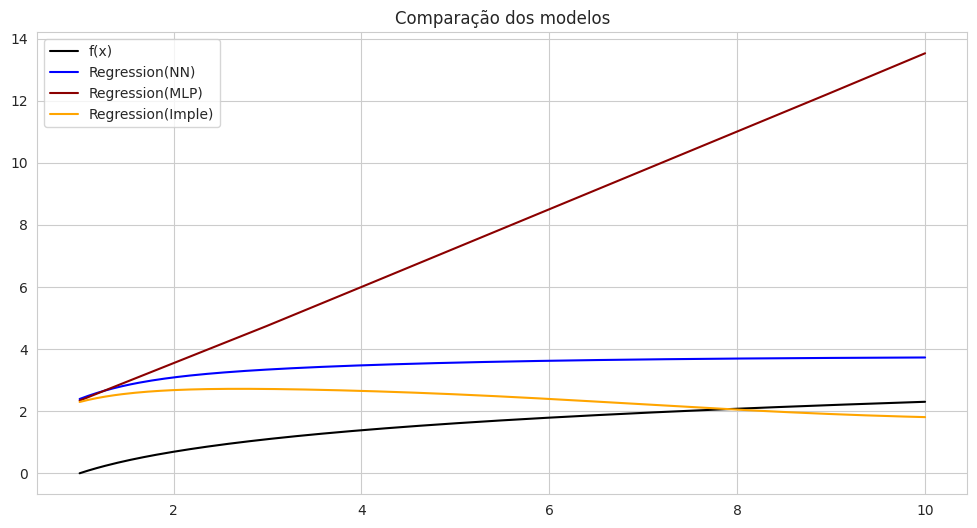

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação dos modelos')
plt.plot(x,y[0],color='black',label='f(x)')
plt.plot(x, model_.predict(x.reshape(-1,1)),color='blue',label='Regression(NN)')
plt.plot(x, model__.predict(x.reshape(-1,1)),color='darkred',label='Regression(MLP)')
plt.plot(x.reshape(-1,1), out ,color = 'orange', label='Regression(Imple)')
plt.legend()

In [ ]:
print('Rede Keras: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print('\nMLPRegressor Sklearn: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred__)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred__))}")
print('\nImplementação da rede: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred))}")

Rede Keras: 

MSE: 0.3388057242067523 
MAE: 0.6610951117889968

MLPRegressor Sklearn: 

MSE: 0.011630111455176206 
MAE: 0.0894203015691624

Implementação da rede: 

MSE: 0.3618842368113086 
MAE: 0.6691251895855


### $c) f(x) = 10x^{5}+ 5x^{4}+ 2x^{3}– 0.5x^{2} + 3x + 2, 0 \leq x \leq 5$

In [ ]:
x = np.linspace(0,5,200)
f = lambda x: 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2
y = f(x)
y = np.array([y])

In [ ]:
df = pd.DataFrame(data={'x':x,'y':y[0]})
df

,x,y
0,0.000000,2.000000
1,0.025126,2.075095
2,0.050251,2.149780
3,0.075377,2.224332
4,0.100503,2.299100
...,...,...
195,4.899497,31354.183296
196,4.924623,32148.718028
197,4.949749,32959.287604
198,4.974874,33786.133598


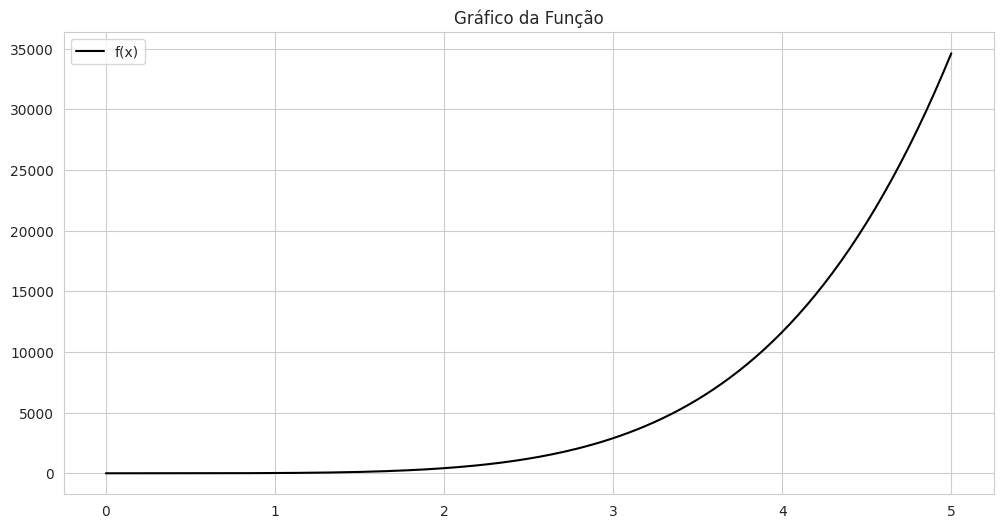

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.set_title('Gráfico da Função')
ax.plot(x,y[0], c='black',label='f(x)')
ax.legend(loc='best')

In [ ]:
minmax = MinMaxScaler()


X_train, X_test, y_train,y_test = train_test_split(x,y[0], test_size=0.3)
X_train = minmax.fit_transform(X_train.reshape(-1,1))
X_test = minmax.transform(X_test.reshape(-1,1))
X_train.shape


(140, 1)

In [ ]:
model_ = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dense(1, activation='linear')
])

model_.compile(optimizer='adam',metrics=['mean_squared_error'],loss =['mean_squared_error'] )
history = model_.fit(X_train, y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
5/5 [==============================] - 1s 53ms/step - loss: 127706840.0000 - mean_squared_error: 127706840.0000 - val_loss: 81576280.0000 - val_mean_squared_error: 81576280.0000
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 127705616.0000 - mean_squared_error: 127705616.0000 - val_loss: 81575376.0000 - val_mean_squared_error: 81575376.0000
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 127704504.0000 - mean_squared_error: 127704504.0000 - val_loss: 81574488.0000 - val_mean_squared_error: 81574488.0000
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: 127703288.0000 - mean_squared_error: 127703288.0000 - val_loss: 81573648.0000 - val_mean_squared_error: 81573648.0000
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 127702208.0000 - mean_squared_error: 127702208.0000 - val_loss: 81572792.0000 - val_mean_squared_error: 81572792.0000
Epoch 6/100
5/5 [==============================] -

2/2 [==============================] - 0s 12ms/step
MSE: 59907809.75588841 
MAE: 5957.605033242905


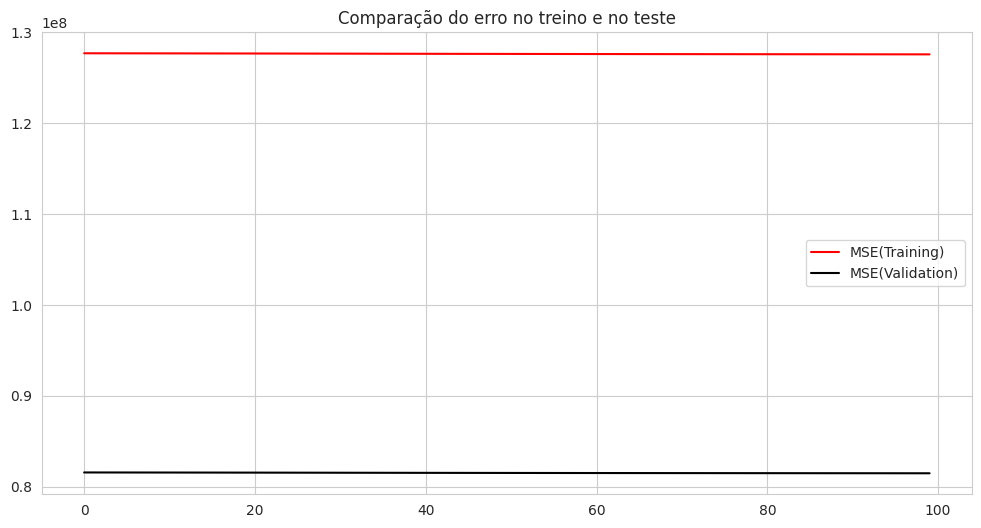

In [ ]:
y_pred_ = model_.predict(X_test)
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")

plt.figure(figsize=(12,6))
plt.title('Comparação do erro no treino e no teste')
plt.plot(history.history['loss'],color='red',label='MSE(Training)')
plt.plot(history.history['val_loss'],color='black',label='MSE(Validation)')
plt.legend(loc='best')

###  MLPRegressor Sklearn

MSE: 58701108.794813104 
MAE: 5870.342529252827


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


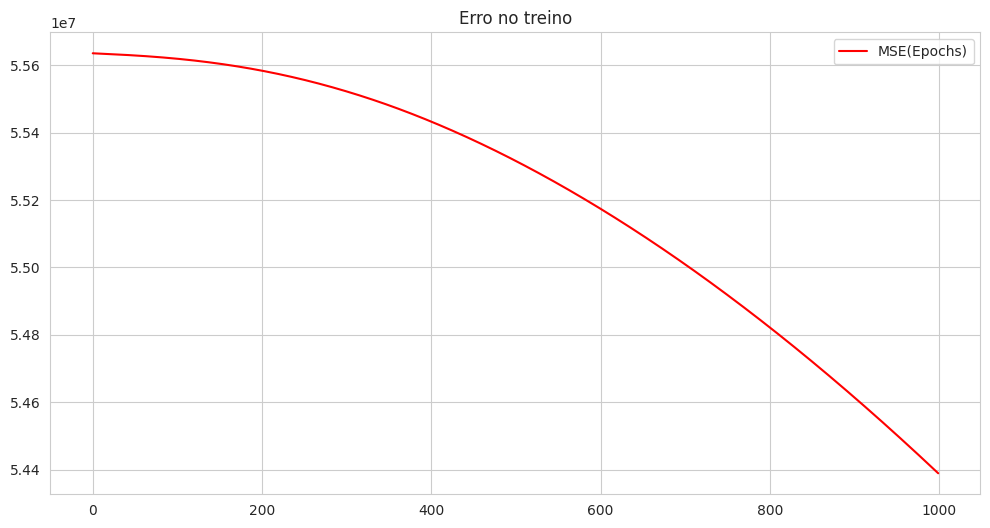

In [ ]:
model__ = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000)
history = model__.fit(X_train,y_train)
y_pred__ = model__.predict(X_test)

print(f"MSE: {0.5*np.mean((y_test-y_pred__)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred__))}")

plt.figure(figsize=(12,6))
plt.title('Erro no treino')
plt.plot(history.loss_curve_,color='red',label='MSE(Epochs)')
plt.legend(loc='best')

### Implementação da rede

In [ ]:
y_train = y_train.reshape(-1,1)
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]


In [ ]:

model = NeuralNetwork(func_cost=mse, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=sigmoid ))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=sigmoid ))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=linear))

history = model.fit(X_train,y_train, X_test, y_test.reshape(-1,1), epochs=3000, verbose=300)
y_pred = model.predict(X_test)

/content/nn.py:11: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-x))


epoch:    0/3000 loss_train: 42906794.66290959
epoch:  300/3000 loss_train: 37898350.80429235
epoch:  600/3000 loss_train: 37898350.80429235
epoch:  900/3000 loss_train: 37898350.80429235
epoch: 1200/3000 loss_train: 37898350.80429235
epoch: 1500/3000 loss_train: 37898350.80429235
epoch: 1800/3000 loss_train: 37898350.80429235
epoch: 2100/3000 loss_train: 37898350.80429235
epoch: 2400/3000 loss_train: 37898350.80429235
epoch: 2700/3000 loss_train: 37898350.80429235
epoch: 3000/3000 loss_train: 37898350.80429235


MAE: 7968.519290913376
MSE: 55331092.84602505 


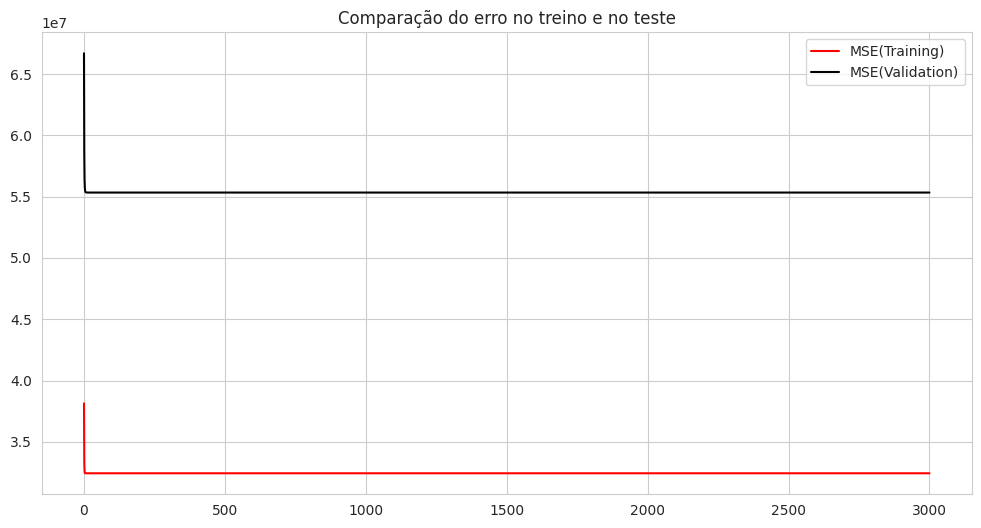

In [ ]:
out = model.predict(x.reshape(-1,1))
print(f"MAE: {np.mean(abs(y_test-y_pred))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")

plt.figure(figsize=(12,6))
plt.title('Comparação do erro no treino e no teste')
plt.plot(history['loss'],color='red',label='MSE(Training)')
plt.plot(history['val_loss'],color='black',label='MSE(Validation)')
plt.legend(loc='best')

7/7 [==============================] - 0s 2ms/step
Rede Keras: 

MSE: 79282579.709738 
MAE: 7123.270897979918

MLPRegressor Sklearn: 

MSE: 78260336.25267844 
MAE: 7066.9015964126775

Implementação da rede: 

MSE: 55331092.84602505 
MAE: 7968.519290913376


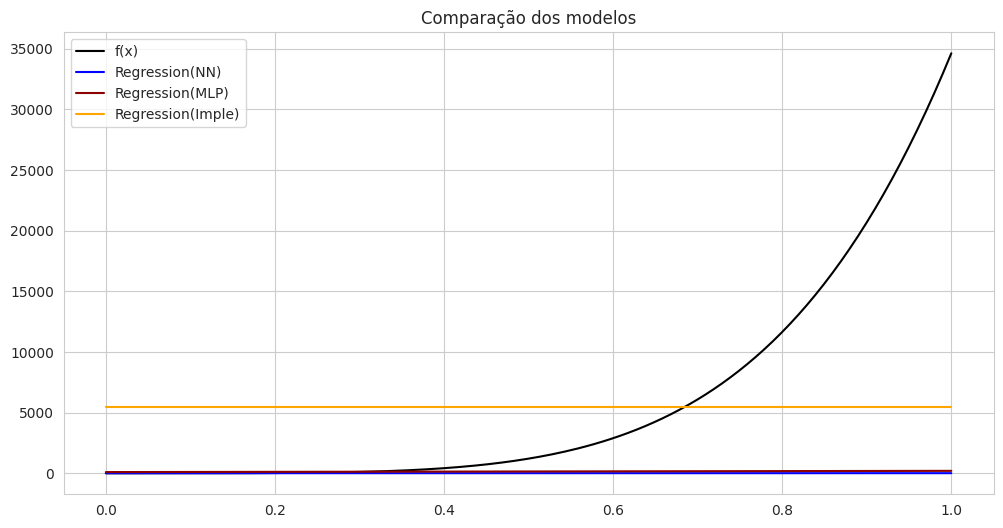

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Comparação dos modelos')
plt.plot(x,y[0],color='black',label='f(x)')
plt.plot(x, model_.predict(x),color='blue',label='Regression(NN)')
plt.plot(x, model__.predict(x.reshape(-1,1)),color='darkred',label='Regression(MLP)')
plt.plot(x.reshape(-1,1), out ,color = 'orange', label='Regression(Imple)')
plt.legend()

print('Rede Keras: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print('\nMLPRegressor Sklearn: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred__)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred__))}")
print('\nImplementação da rede: \n')
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")
print(f"MAE: {np.mean(abs(y_test-y_pred))}")

## Questão 03

$\hspace{0.5cm}$Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no
círculo um losango também centrado na origem e com lados iguais à raiz de 2. Os dados das
classes C1, C2, C3, C4 correspondem aos quatro setores do losango e as outras quatro
classes correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar
aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto
de treinamento e um conjunto de validação. Treine uma rede perceptron para classificar os
padrões associados a cada uma das classes. Verifique o desempenho do classificador usando
o conjunto de validação e calculando a matriz de confusão.

In [ ]:
def create_df(n_examples):
    x = np.random.uniform(-1,1,n_examples)
    y = np.random.uniform(-1,1,n_examples)

    df = pd.DataFrame(data={'x':[0.4],'y':[0.4], 'Class':[0]})

    for i in range(len(x)):

        if y[i] <= 1 - x[i] and x[i] >= 0 and y[i] >= 0:
            df.loc[len(df)] = [x[i], y[i], 0]

        elif (y[i] >= 1 - x[i] and x[i] >= 0 and y[i] >= 0 and x[i]**2 + y[i]**2 <= 1):
            df.loc[len(df)] = [x[i],y[i], 4]

        elif y[i] <= 1 + x[i] and x[i] <= 0 and y[i] >= 0:
            df.loc[len(df)] = [x[i],y[i], 1]

        elif y[i] >= 1 + x[i] and x[i] <= 0 and y[i] >= 0 and x[i]**2 + y[i]**2 <= 1:
            df.loc[len(df)] = [x[i],y[i], 5]

        elif y[i] >= x[i] - 1 and x[i] >= 0 and y[i] <= 0:
            df.loc[len(df)] = [x[i],y[i], 3]

        elif y[i] <= x[i] - 1 and x[i] >= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <= 1:
            df.loc[len(df)] = [x[i],y[i], 7]

        elif y[i] >= -1 - x[i] and x[i] <= 0 and y[i] <= 0:
            df.loc[len(df)] = [x[i],y[i], 2]

        elif y[i] <= -1 - x[i] and x[i] <= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <= 1:
            df.loc[len(df)] = [x[i],y[i], 6]

    return df

In [ ]:
df = create_df(5000)

In [ ]:
df = df.sort_values(by='Class')
df

,x,y,Class
0,0.400000,0.400000,0.0
1670,0.162885,0.600204,0.0
1697,0.179742,0.801892,0.0
1703,0.724376,0.070773,0.0
1720,0.351448,0.190420,0.0
...,...,...,...
66,0.818728,-0.513255,7.0
1333,0.741635,-0.517504,7.0
1350,0.562064,-0.675019,7.0
1302,0.417807,-0.788096,7.0


In [ ]:
df['Class'].value_counts()

Class
1.0    676
2.0    634
3.0    624
0.0    615
6.0    362
7.0    361
5.0    345
4.0    343
Name: count, dtype: int64

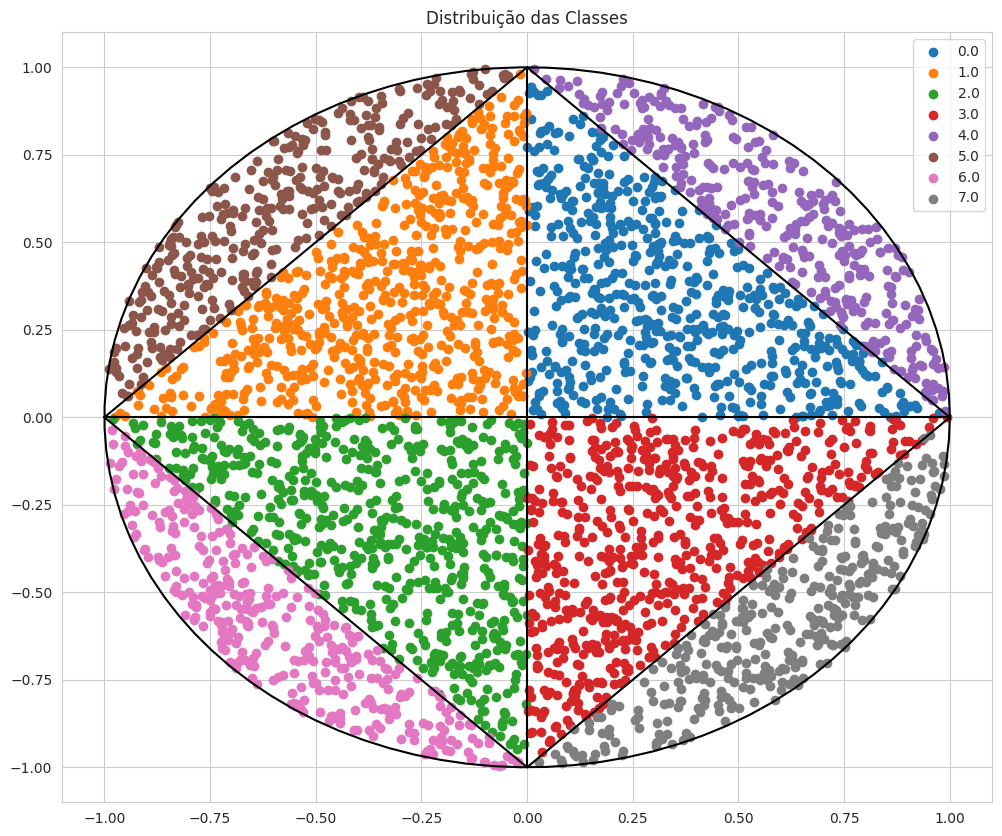

In [ ]:
def plot2d(df):

    classes = df['Class'].unique()

    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)

    for classe in classes:
        valores = df[df['Class'] == classe].values
        x,y = valores[:,0] , valores[:,1]
        ax.scatter(x,y, label=classe)

    #círculo
    theta = np.linspace( 0 , 2 * np.pi , 100)

    raio = 1

    a = raio * np.cos( theta )
    b = raio * np.sin( theta )

    #reta 1
    x1 = np.linspace(0,1,100)
    f1 = lambda x: 1 - x
    y1 = f1(x1)

    #reta 2
    x2 = np.linspace(-1,0,100)
    f2 = lambda x: 1 + x
    y2 = f2(x2)

    #reta 3
    x3 = np.linspace(-1,0,100)
    f3 = lambda x: - 1 - x
    y3 = f3(x3)

    #reta 4
    x4 = np.linspace(0,1,100)
    f4 = lambda x: x - 1
    y4 = f4(x4)

    #eixo x e y
    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)

    ax.plot(a,b, x1,y1, x2,y2, x3,y3 , x4,y4, c='black')
    ax.plot(np.zeros((100,)),y, x,np.zeros((100,)) ,c='black')
    ax.set_title("Distribuição das Classes")
    ax.legend(loc="best")

plot2d(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['x','y']].values,df['Class'].values,test_size=0.3, random_state=42)
y_train

array([5., 3., 0., ..., 1., 6., 5.])

In [ ]:
classes = [f'C{i}' for i in range(1,9)]
classes

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']

### MLPClassifier Sklearn sem Momentum

In [ ]:
model = MLPClassifier(max_iter=1000, solver='adam')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Reporte: 
              precision    recall  f1-score   support

          C1       1.00      0.99      0.99       210
          C2       0.99      0.99      0.99       195
          C3       0.99      0.97      0.98       185
          C4       1.00      0.99      0.99       203
          C5       0.98      1.00      0.99        93
          C6       1.00      1.00      1.00        96
          C7       0.95      1.00      0.98       104
          C8       0.99      1.00      1.00       102

    accuracy                           0.99      1188
   macro avg       0.99      0.99      0.99      1188
weighted avg       0.99      0.99      0.99      1188

Matriz de Confusão: 



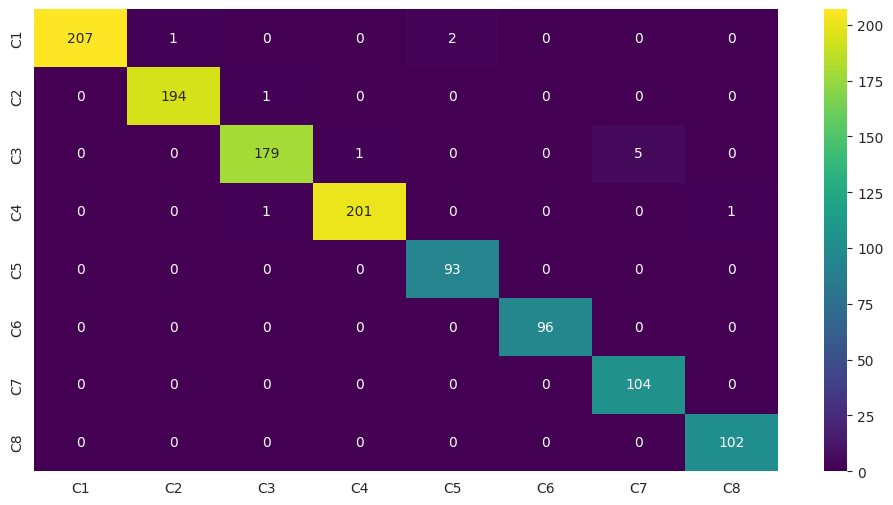

In [ ]:
print('Reporte: ')
print(classification_report(y_test,y_pred, target_names=classes))
print('Matriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d", cmap='viridis', xticklabels=classes, yticklabels=classes)
plt.show()

### MLPClassifier Sklearn com Momentum

In [ ]:
model = MLPClassifier(max_iter=1000, solver='sgd', momentum=0.9)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Reporte: 
              precision    recall  f1-score   support

          C1       1.00      0.92      0.96       210
          C2       0.94      0.98      0.96       195
          C3       0.97      0.95      0.96       185
          C4       0.99      0.97      0.98       203
          C5       0.93      1.00      0.96        93
          C6       0.99      0.97      0.98        96
          C7       0.93      1.00      0.96       104
          C8       0.96      0.99      0.98       102

    accuracy                           0.97      1188
   macro avg       0.96      0.97      0.97      1188
weighted avg       0.97      0.97      0.97      1188

Matriz de Confusão: 



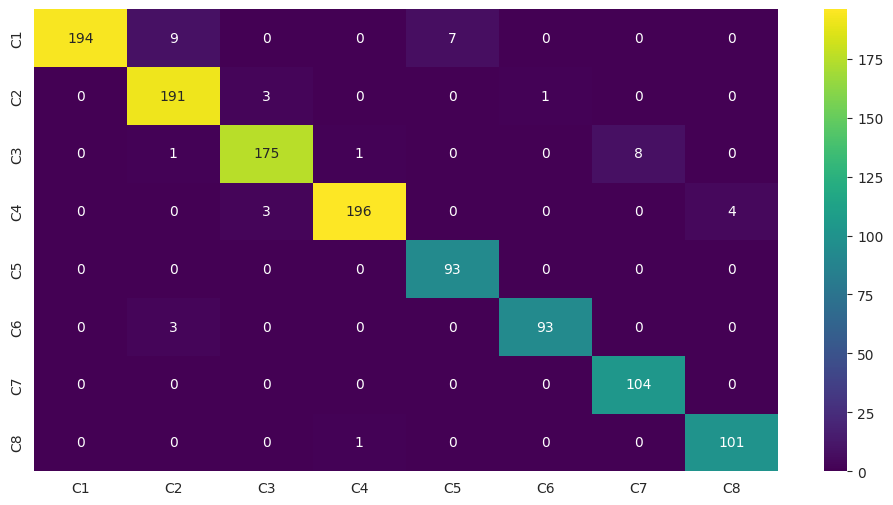

In [ ]:
print('Reporte: ')
print(classification_report(y_test,y_pred, target_names=classes))
print('Matriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d", cmap='viridis', xticklabels=classes, yticklabels=classes)
plt.show()

## Questão 04

$\hspace{0.5cm}$Utilize a rede neural perceptron de múltiplas camadas para fazer a predição de um passo,
até predição de três passos, da série temporal $x(n) = \sin^{2}
(n) + \cos(n+\cos(n))  $.Avalie o desempenho mostrando para cada caso os erros de predição.

In [112]:
x = np.arange(0,100)
f = lambda x: np.sin(x)**2 + np.cos(x + np.cos(x))
y = f(x)

In [113]:
df = pd.DataFrame(y, index=x, columns=['Saída'])

<Axes: >

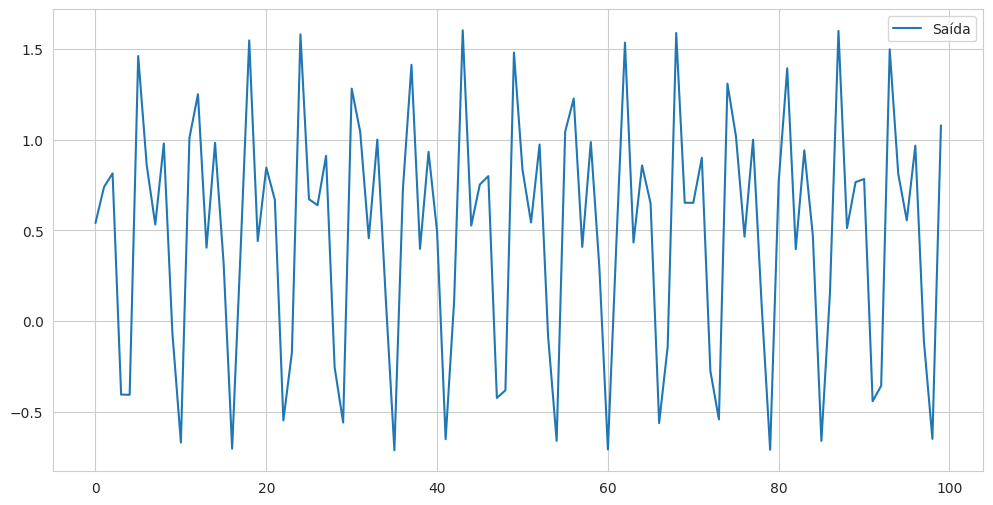

In [114]:
df.plot(figsize=(12,6))

In [115]:
def series_to_supervised(serie, steps_in):
    features = pd.DataFrame()
    features['t'] = serie
    for i in range(1, steps_in+1):
        features['t-'+str(i)] = serie.shift(i)
    features = features.iloc[steps_in:]
    return features

In [116]:
ts = df['Saída']
k = 12
data_features = series_to_supervised(ts, k)
data_features

,t,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12
12,1.249658,1.008832,-0.669434,-0.062893,0.978311,0.531544,0.857538,1.460239,-0.406359,-0.405311,0.813765,0.738563,0.540302
13,0.404245,1.249658,1.008832,-0.669434,-0.062893,0.978311,0.531544,0.857538,1.460239,-0.406359,-0.405311,0.813765,0.738563
14,0.981733,0.404245,1.249658,1.008832,-0.669434,-0.062893,0.978311,0.531544,0.857538,1.460239,-0.406359,-0.405311,0.813765
15,0.319912,0.981733,0.404245,1.249658,1.008832,-0.669434,-0.062893,0.978311,0.531544,0.857538,1.460239,-0.406359,-0.405311
16,-0.703644,0.319912,0.981733,0.404245,1.249658,1.008832,-0.669434,-0.062893,0.978311,0.531544,0.857538,1.460239,-0.406359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.555134,0.810846,1.496792,-0.356902,-0.441869,0.782695,0.764930,0.511969,1.598441,0.151278,-0.660392,0.469849,0.940395
96,0.966451,0.555134,0.810846,1.496792,-0.356902,-0.441869,0.782695,0.764930,0.511969,1.598441,0.151278,-0.660392,0.469849
97,-0.109378,0.966451,0.555134,0.810846,1.496792,-0.356902,-0.441869,0.782695,0.764930,0.511969,1.598441,0.151278,-0.660392
98,-0.649542,-0.109378,0.966451,0.555134,0.810846,1.496792,-0.356902,-0.441869,0.782695,0.764930,0.511969,1.598441,0.151278


In [117]:
X = data_features[['t-12','t-11','t-10','t-9','t-8','t-7','t-6','t-5','t-4','t-3']].values
y = data_features[['t-2','t-1','t']].values

X_train,y_train = X[:len(X)//2 + 20], y[:len(y)//2 + 20]
X_test,y_test = X[len(X)//2 + 20:], y[len(y)//2 + 20:]

### MLPRegressor Sklearn

In [118]:
model_ = MLPRegressor(hidden_layer_sizes=(100,),max_iter=1000)
history = model_.fit(X_train,y_train)
y_pred_ = model_.predict(X_test)

In [119]:
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")

MAE: 0.04421114280115125
MSE: 0.0015599004159737814 


### Entrada f(0) até f(9)

In [120]:
x_input = np.array([[f(i) for i in range(10)]])
x_input

array([[ 0.54030231,  0.73856271,  0.81376534, -0.40531079, -0.40635904,
         1.46023929,  0.85753803,  0.53154379,  0.97831141, -0.06289252]])

In [121]:
print('Saída do modelo MLPRegressor: \n')
print(model_.predict(x_input))
print('\nValores originais: \n')
print(f(10),f(11),f(12))

Saída do modelo MLPRegressor: 

[[-0.61309838  0.96666292  1.21443948]]

Valores originais: 

-0.6694342222603569 1.0088317080406155 1.2496583824586474


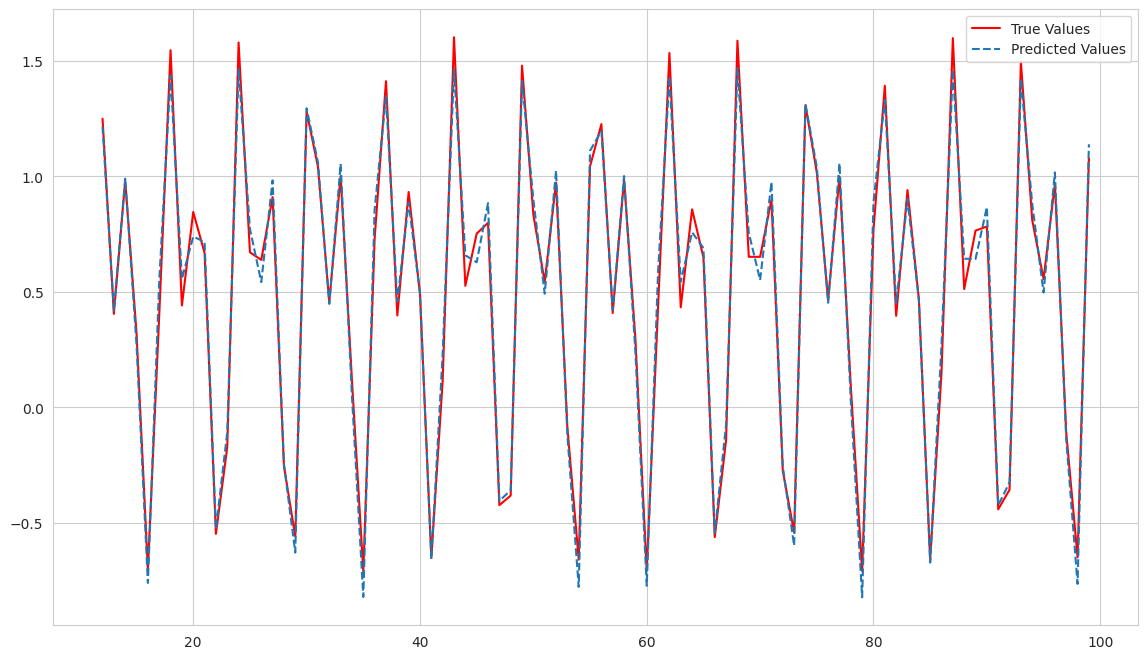

In [122]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(x[k:],f(x[k:]),color='red', label='True Values')
ax.plot(x[k:], model_.predict(X)[:,2], '--',label='Predicted Values' )
ax.legend(loc='best')

Conjunto de teste

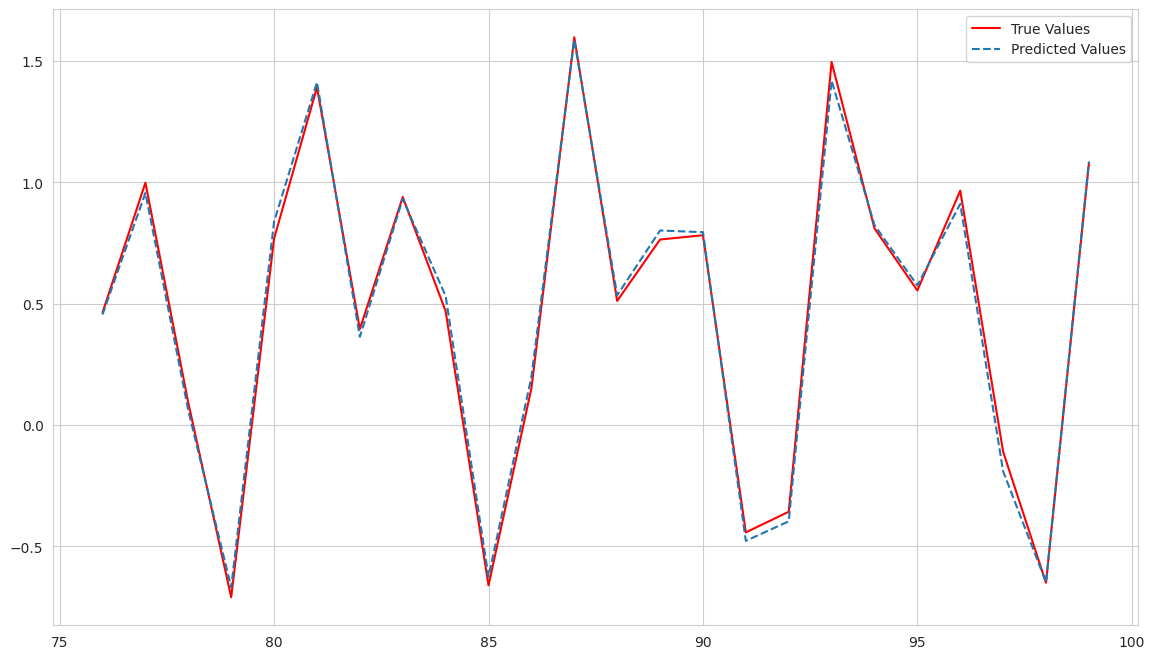

In [123]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(x[-24:],y_test[:,2],color='red', label='True Values')
ax.plot(x[-24:], model.predict(X_test)[:,2], '--',label='Predicted Values' )
ax.legend(loc='best')

### Implementação da rede

In [100]:
dim_entrada = X_train.shape[1]
dim_saida = y_train.shape[1]

In [102]:
model = NeuralNetwork(func_cost=mse, learning_rate=1e-1)

model.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=10, activation=sigmoid))
model.layers.append(Layer(dim_entrada=10, dim_saida=10, activation=sigmoid))
model.layers.append(Layer(dim_entrada=10, dim_saida=dim_saida, activation=linear))

model.fit(X_train,y_train, X_test, y_test, epochs=3000, verbose=300)
y_pred = model.predict(X_test)

epoch:    0/3000 loss_train: 0.55075431
epoch:  300/3000 loss_train: 0.00805218
epoch:  600/3000 loss_train: 0.00474677
epoch:  900/3000 loss_train: 0.00320355
epoch: 1200/3000 loss_train: 0.00227317
epoch: 1500/3000 loss_train: 0.00167707
epoch: 1800/3000 loss_train: 0.00128360
epoch: 2100/3000 loss_train: 0.00101723
epoch: 2400/3000 loss_train: 0.00083156
epoch: 2700/3000 loss_train: 0.00069785
epoch: 3000/3000 loss_train: 0.00059828


In [103]:
print('Saída do MLPRegressor: \n')
print(f"MAE: {np.mean(abs(y_test-y_pred_))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred_)**2)} ")
print('\nSaída da implementação: \n')
print(f"MAE: {np.mean(abs(y_test-y_pred))}")
print(f"MSE: {0.5*np.mean((y_test-y_pred)**2)} ")

Saída do MLPRegressor: 

MAE: 0.04106215076966142
MSE: 0.0013539535399075156 

Saída da implementação: 

MAE: 0.028106392391619866
MSE: 0.0006221760339660926 


### Entrada f(0) até f(9)

In [104]:
print('Saída do modelo MLPRegressor: \n')
print(model_.predict(x_input))
print('\nSaída da implementação: \n')
print(model.predict(x_input))
print('\nValores originais: \n')
print(f(10),f(11),f(12))

Saída do modelo MLPRegressor: 

[[-0.69320424  0.97860129  1.27590197]]

Saída da implementação: 

[[-0.64492678  1.06288636  1.26138846]]

Valores originais: 

-0.6694342222603569 1.0088317080406155 1.2496583824586474


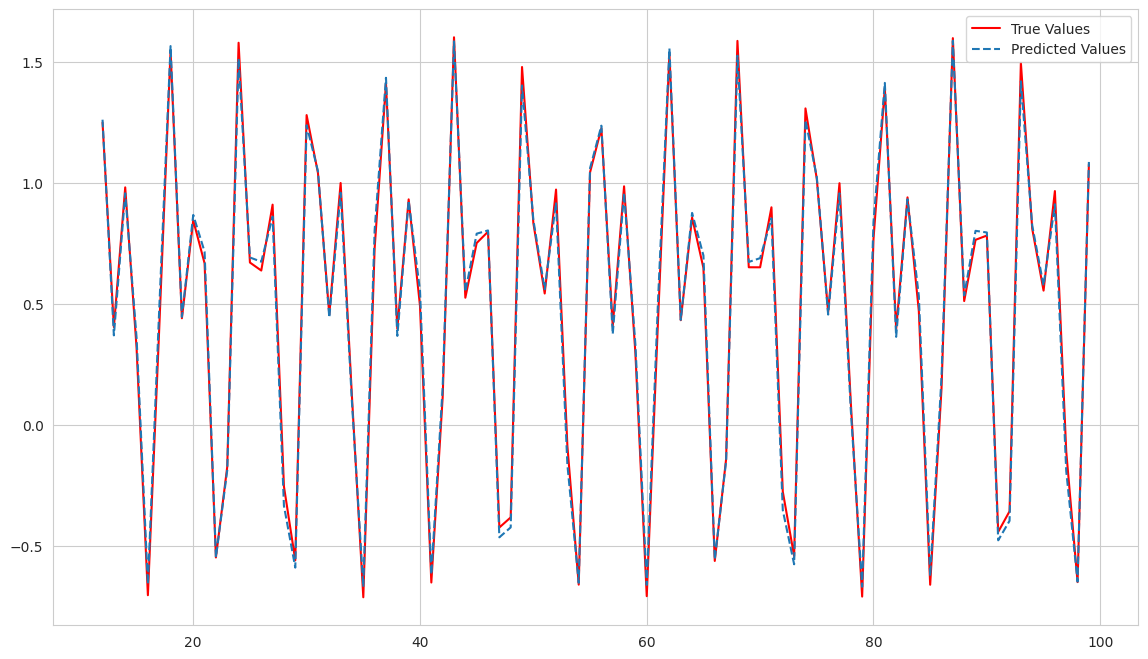

In [105]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(x[k:],f(x[k:]),color='red', label='True Values')
ax.plot(x[k:], model.predict(X)[:,2], '--',label='Predicted Values' )
ax.legend(loc='best')

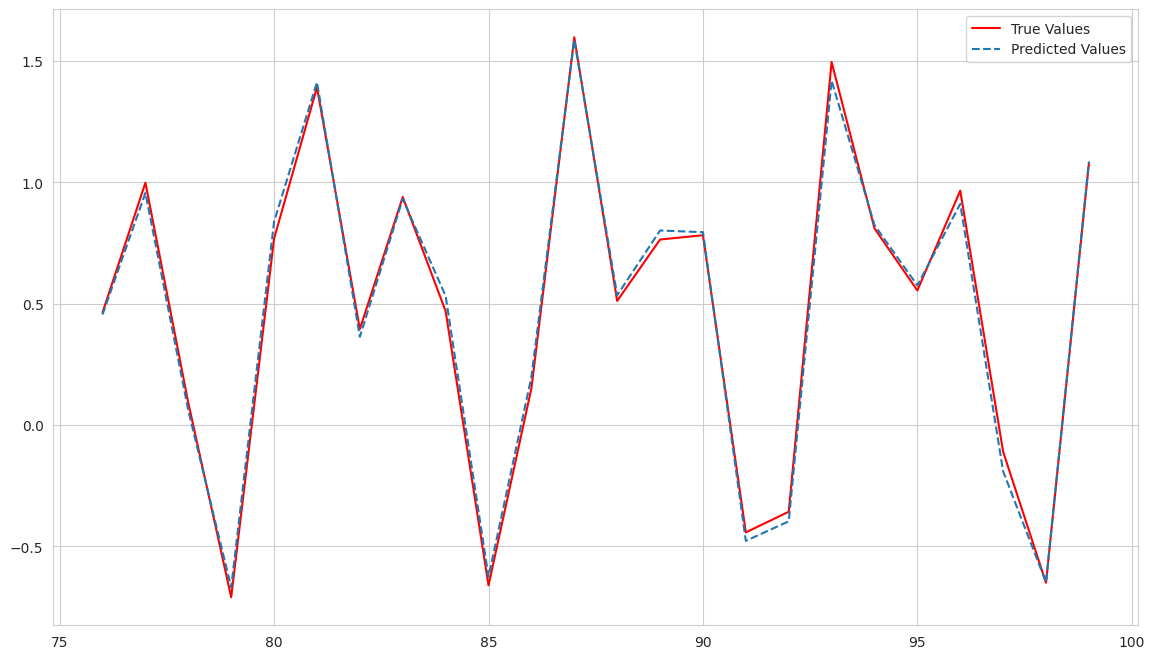

In [111]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)

ax.plot(x[-24:],y_test[:,2],color='red', label='True Values')
ax.plot(x[-24:], model.predict(X_test)[:,2], '--',label='Predicted Values' )
ax.legend(loc='best')

## Questão 05

$\hspace{0.5cm}$Implemente uma Rede Neural Artificial que faça a predição se um passageiro sobreviveu ou
não ao acidente do Titanic. Embora houvesse algum elemento de sorte envolvido na
sobrevivência dos envolvidos, aparentemente alguns grupos de pessoas tinham mais
probabilidade de sobreviver do que outros. Neste exercício, você deve tentar criar um modelo
preditivo, usando os dados de passageiros (ou seja, nome, idade, sexo, classe
socioeconômica, etc.), que procure responder à pergunta: "que tipo de pessoa tem mais
probabilidade de sobreviver?" A base de dados do problema pode ser acessada através do
seguinte link: <a href="https://www.kaggle.com/c/titanic/data"> Titanic | Kaggle </a></p>

### Train Dataset

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

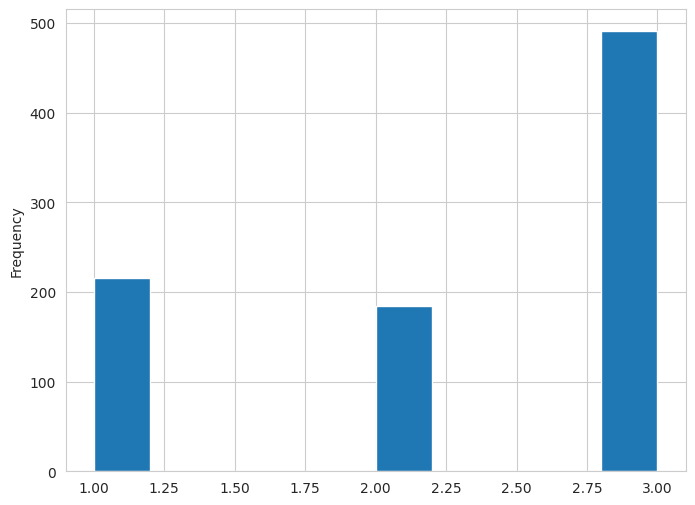

In [ ]:
plt.figure(figsize=(8,6))
train['Pclass'].plot(kind='hist')

In [ ]:
train = train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'])
train['Sex'] = train['Sex'].apply(lambda x: 1 if x=='female' else 0)

<Axes: >

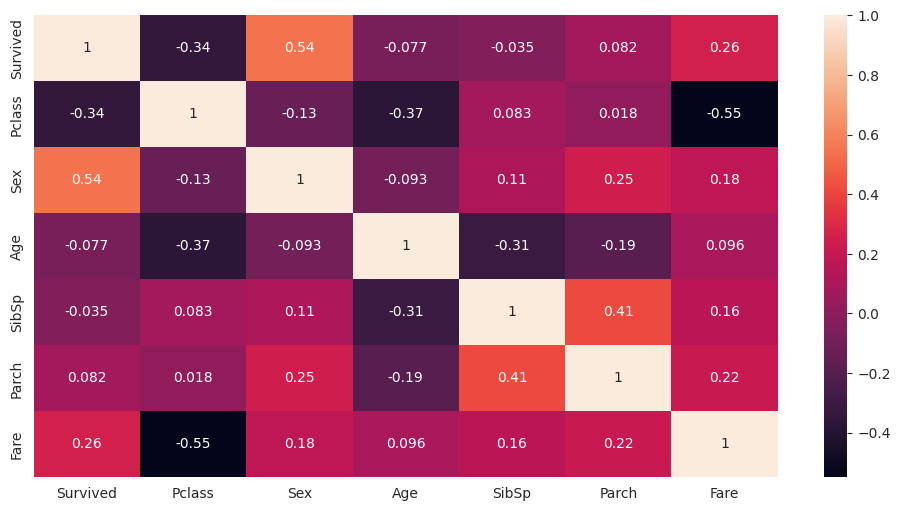

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), annot=True)

In [ ]:
train = train.drop(columns=['SibSp','Parch','Age'])
train = train[['Sex','Fare','Pclass','Survived']]

<Axes: xlabel='Sex', ylabel='count'>

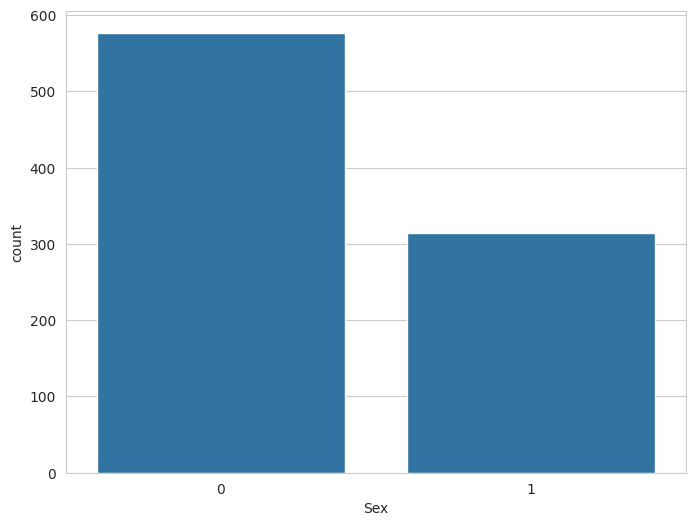

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=train)

In [ ]:
train.head()

,Sex,Fare,Pclass,Survived
0,0,7.2500,3,0
1,1,71.2833,1,1
2,1,7.9250,3,1
3,1,53.1000,1,1
4,0,8.0500,3,0


### Test Dataset

In [ ]:
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gender['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [ ]:
new_test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked','SibSp','Parch','Age'])
new_test = new_test[['Sex','Fare','Pclass']]

In [ ]:
new_test['Sex'] = new_test['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [ ]:
for i in range(len(new_test['Fare'].reset_index().drop(columns=['index'])['Fare'].isnull())):
    if new_test['Fare'].reset_index().drop(columns=['index'])['Fare'].isnull()[i] == True:
        print(new_test['Fare'].reset_index().drop(columns=['index'])['Fare'].index[i])

152


In [ ]:
new_test.iloc[152]

Sex       0.0
Fare      NaN
Pclass    3.0
Name: 152, dtype: float64

<Axes: ylabel='Frequency'>

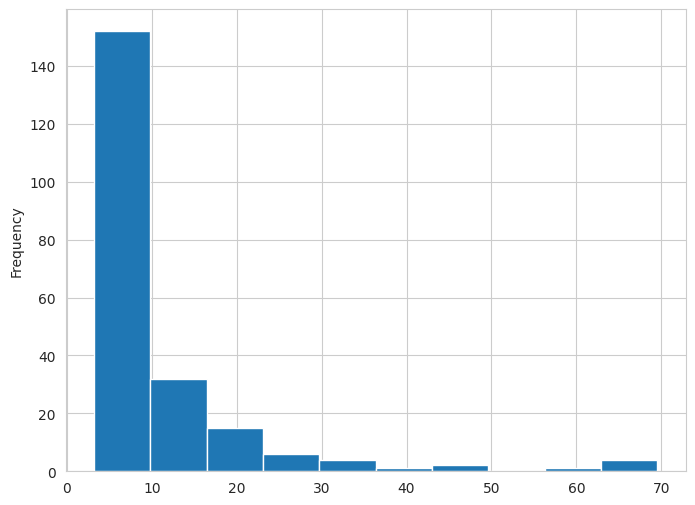

In [ ]:
plt.figure(figsize=(8,6))
new_test[new_test['Pclass'] == 3]['Fare'].plot(kind='hist')

In [ ]:
values = {'Fare': int(new_test[new_test['Pclass'] == 3]['Fare'].mode()[0])}

new_test = new_test.fillna(value=values)

In [ ]:
new_test.isnull().sum()

Sex       0
Fare      0
Pclass    0
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

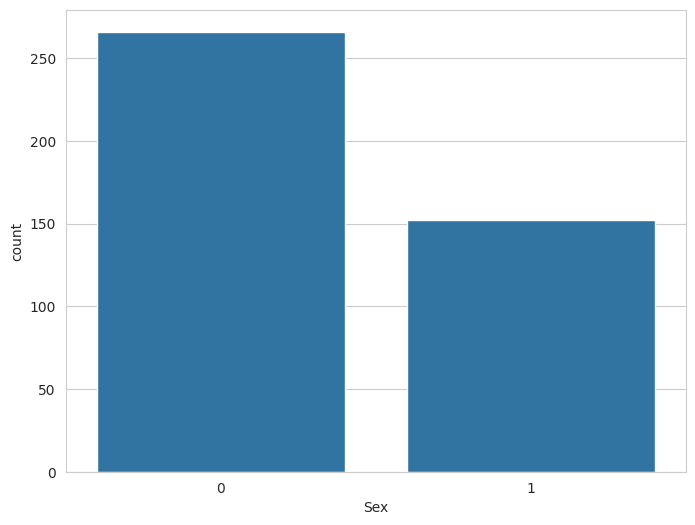

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', data=new_test)

In [ ]:
new_test.head()

,Sex,Fare,Pclass
0,0,7.8292,3
1,1,7.0000,3
2,0,9.6875,2
3,0,8.6625,3
4,1,12.2875,3


### Normalização

In [ ]:
scale = MinMaxScaler()
X_train = scale.fit_transform(train.drop(columns=['Survived']))
y_train = train['Survived'].values

In [ ]:
X_test = scale.transform(new_test.values)
y_test = gender['Survived'].values

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(X_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
28/28 [==============================] - 4s 39ms/step - loss: 0.6206 - accuracy: 0.7733 - val_loss: 0.5425 - val_accuracy: 0.8278
Epoch 2/100
28/28 [==============================] - 0s 14ms/step - loss: 0.5460 - accuracy: 0.7845 - val_loss: 0.4228 - val_accuracy: 0.9856
Epoch 3/100
28/28 [==============================] - 0s 7ms/step - loss: 0.4890 - accuracy: 0.7879 - val_loss: 0.3354 - val_accuracy: 1.0000
Epoch 4/100
28/28 [==============================] - 0s 12ms/step - loss: 0.4656 - accuracy: 0.7879 - val_loss: 0.3019 - val_accuracy: 1.0000
Epoch 5/100
28/28 [==============================] - 0s 9ms/step - loss: 0.4587 - accuracy: 0.7666 - val_loss: 0.2824 - val_accuracy: 1.0000
Epoch 6/100
28/28 [==============================] - 0s 8ms/step - loss: 0.4565 - accuracy: 0.7868 - val_loss: 0.2773 - val_accuracy: 1.0000
Epoch 7/100
28/28 [==============================] - 0s 7ms/step - loss: 0.4541 - accuracy: 0.7868 - val_loss: 0.2784 - val_accuracy: 1.0000
Epoch 8/10

### Rede Keras

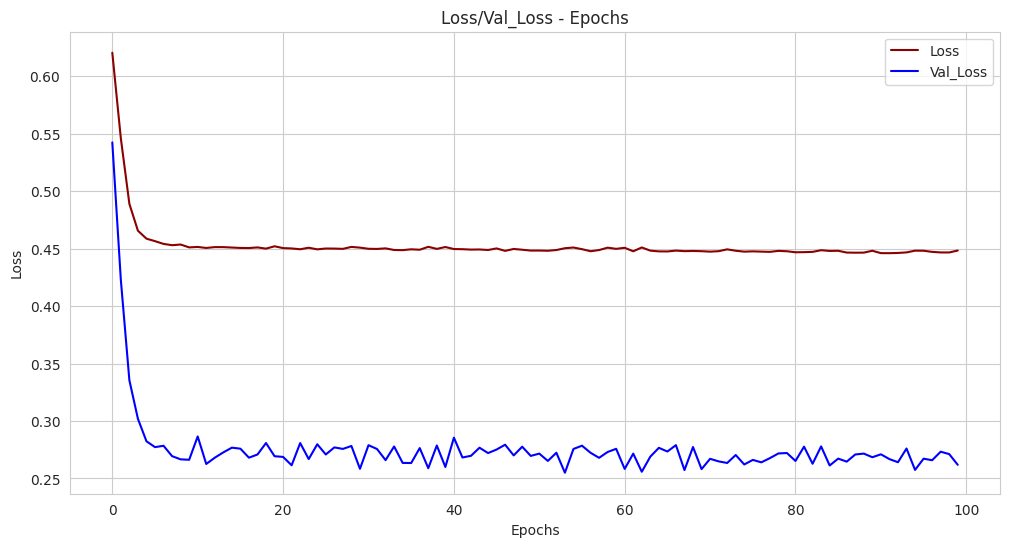

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

14/14 [==============================] - 0s 2ms/step
Reporte: 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.97      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418


Matriz de Confusão: 



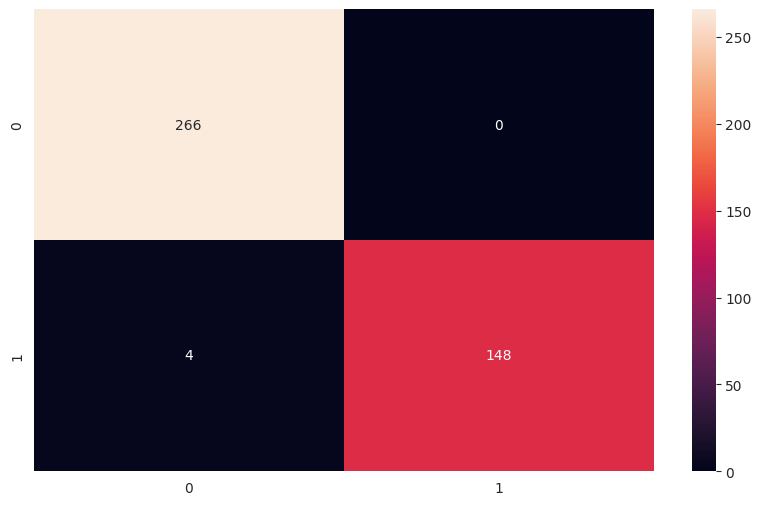

In [ ]:
y_pred = model.predict(X_test)

for i in range(len(y_pred)):
    if y_pred[i,0] > 0.5:
        y_pred[i,0] = 1
    else:
        y_pred[i,0] = 0

print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d")
plt.show()

In [ ]:
dim_entrada = X_train.shape[1]
dim_saida = y_train.reshape(-1,1).shape[1]

In [ ]:
modelo_ = NeuralNetwork(func_cost=cross_entropy, learning_rate=1e-3)

modelo_.layers.append(Layer(dim_entrada=dim_entrada, dim_saida=50, activation=relu))
modelo_.layers.append(Layer(dim_entrada=50, dim_saida=30, activation=relu))
modelo_.layers.append(Layer(dim_entrada=30, dim_saida=dim_saida, activation=sigmoid))

modelo_.fit(X_train,y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), epochs=5000, verbose=500)
y_pred_ = modelo_.predict(X_test)

epoch:    0/5000 loss_train: 15.66755323
epoch:  500/5000 loss_train: 0.52732889
epoch: 1000/5000 loss_train: 0.46414715
epoch: 1500/5000 loss_train: 0.44804708
epoch: 2000/5000 loss_train: 0.44100768
epoch: 2500/5000 loss_train: 0.43842139
epoch: 3000/5000 loss_train: 0.43714725
epoch: 3500/5000 loss_train: 0.43637167
epoch: 4000/5000 loss_train: 0.43593151
epoch: 4500/5000 loss_train: 0.43556838
epoch: 5000/5000 loss_train: 0.43525322


### Rede Implementada

Reporte: 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       266
           1       0.98      0.91      0.94       152

    accuracy                           0.96       418
   macro avg       0.96      0.95      0.96       418
weighted avg       0.96      0.96      0.96       418


Matriz de Confusão: 



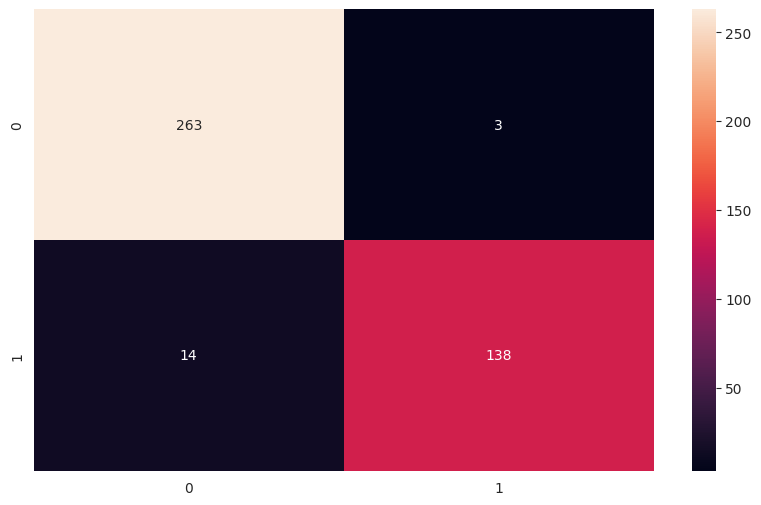

In [ ]:
for i in range(len(y_pred_)):
    if y_pred_[i,0] > 0.5:
        y_pred_[i,0] = 1
    else:
        y_pred_[i,0] = 0

print('Reporte: \n')
print(classification_report(y_test,y_pred_))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred_), annot=True,fmt="d")
plt.show()

In [ ]:
test['true'] = y_test
test['pred'] = y_pred_[:,0]

### Analise de dados

In [ ]:
test.to_csv('test_with_predict.csv', index=False)

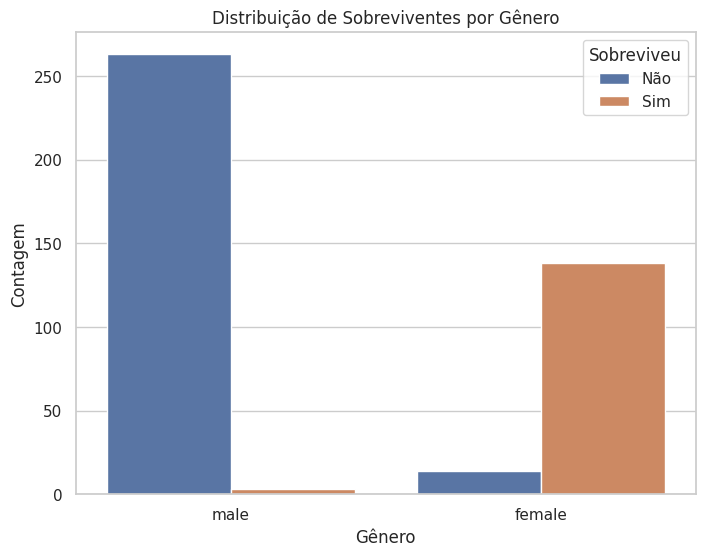

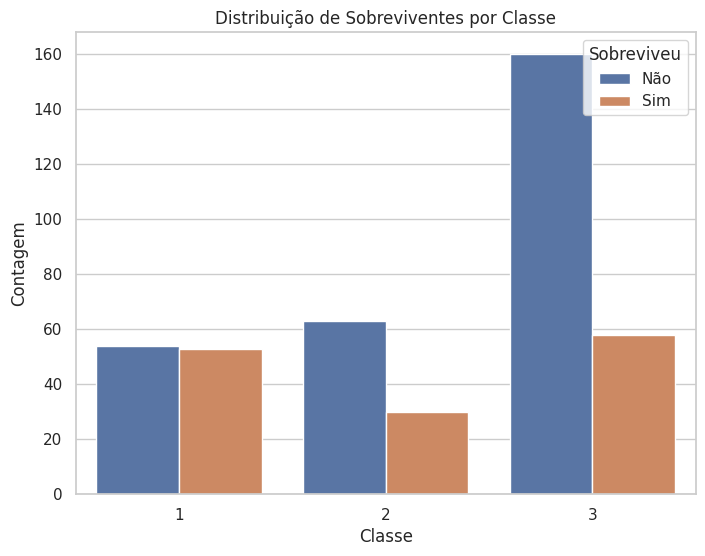

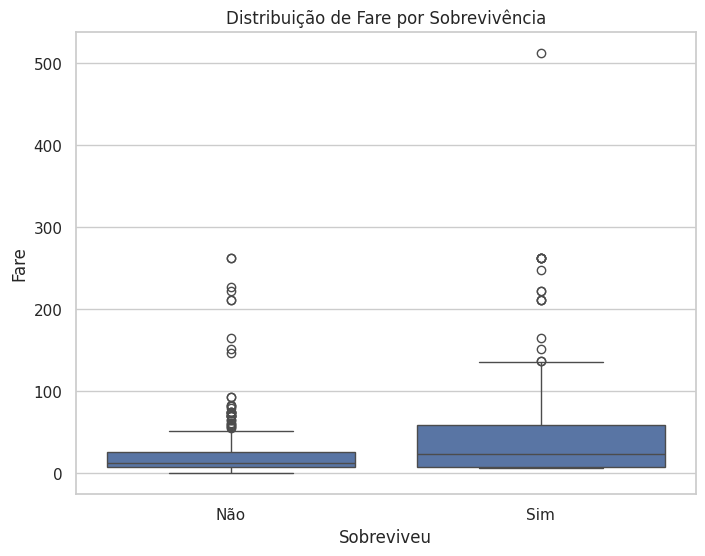

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Plot 1: Sobreviventes por Gênero
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='pred', data=test)
plt.title('Distribuição de Sobreviventes por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

# Plot 2: Sobreviventes por Classe
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='pred', data=test)
plt.title('Distribuição de Sobreviventes por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

# Plot 4: Fare por Sobrevivência
plt.figure(figsize=(8, 6))
sns.boxplot(x='pred', y='Fare', data=test)
plt.title('Distribuição de Fare por Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()


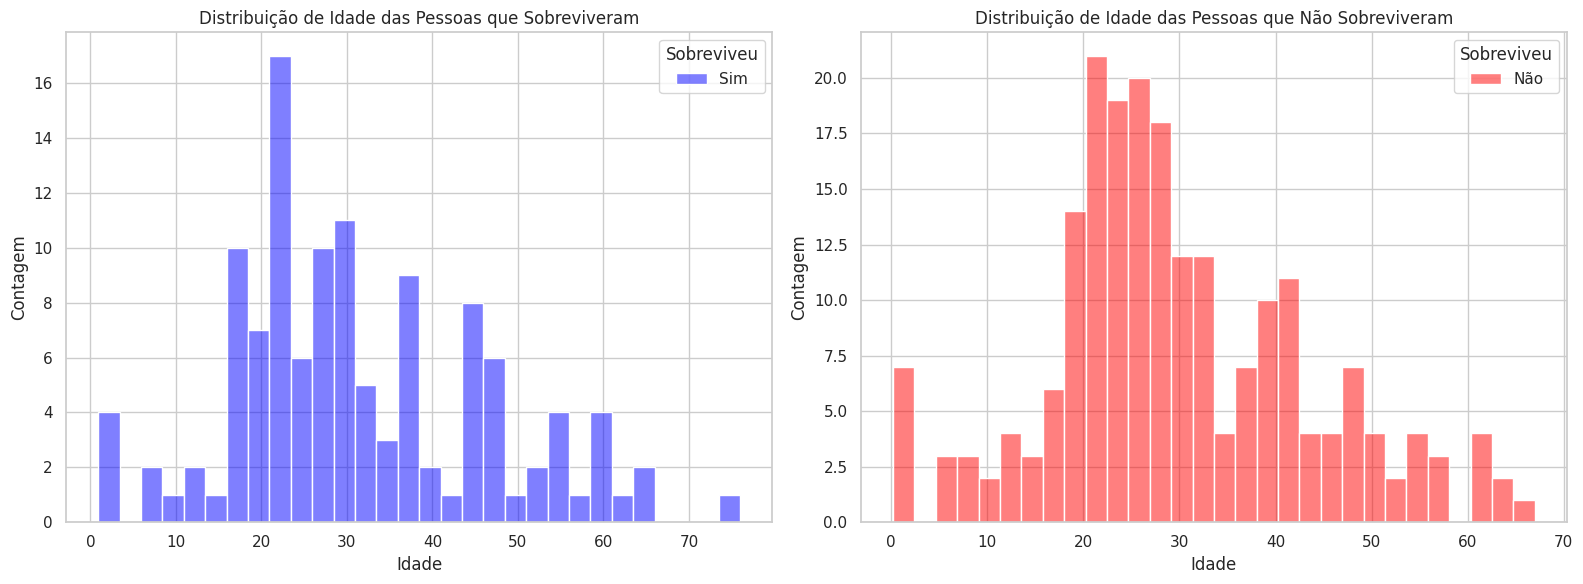

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribuição de Idade por Sobrevivência (empilhado)
sns.histplot(data=test[test['pred'] == 1.0], x='Age', hue='pred', bins=30, palette={0: 'red', 1: 'blue'}, ax=axes[0])
axes[0].set_title('Distribuição de Idade das Pessoas que Sobreviveram')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Contagem')
axes[0].legend(title='Sobreviveu', loc='upper right', labels=['Sim'])

# Plot 2: Distribuição de Idade por Sobrevivência (transparente)
sns.histplot(data=test[test['pred'] == 0.0], x='Age', hue='pred', bins=30, palette={0: 'red', 1: 'blue'}, ax=axes[1])
axes[1].set_title('Distribuição de Idade das Pessoas que Não Sobreviveram')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Contagem')
axes[1].legend(title='Sobreviveu', loc='upper right', labels=['Não'])

plt.tight_layout()
plt.show()

## Questão 06

$\hspace{0.5cm}$Implementar duas redes neurais artificiais para o problema de classificação de dígitos
escritos à mão utilizando a base de dados do MNIST, disponível em: <a href="http://yann.lecun.com/exdb/mnist"> Mnist </a></p>
$\hspace{0.5cm}$A primeira rede deve ser uma rede neural perceptron de múltiplas camadas clássica, e a segunda deve ser uma Rede Neural Convolucional (CNN). Compare o desempenho das duas redes analisando a curva de erro médio e a matriz de
confusão.

In [ ]:
import mnist
from sklearn.preprocessing import OneHotEncoder

images_train, labels_train = mnist.train_images(), mnist.train_labels()
images_test, labels_test = mnist.test_images(), mnist.test_labels()

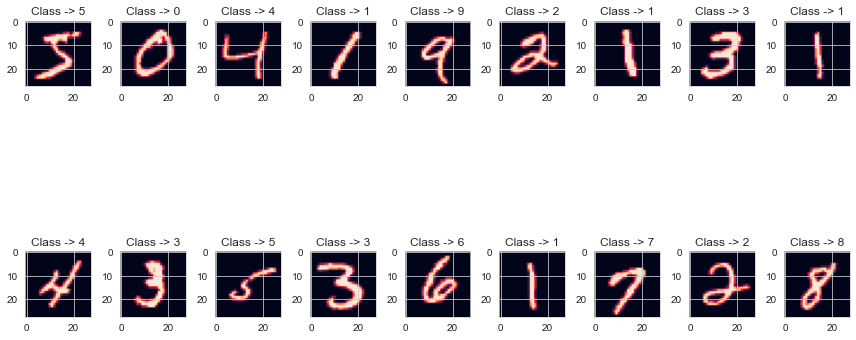

In [ ]:
rows = 2
cols = 9
axes = []
fig = plt.figure(figsize=(12,8))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title = ("Class -> "+str(labels_train[:20][a]))
    axes[-1].set_title(subplot_title)
    plt.imshow(images_train[a])


fig.tight_layout()

In [ ]:
n_instancias_treino = images_train.shape[0]
n_instancias_teste = images_test.shape[0]

print(f'Quantidade de instâncias(treino): {n_instancias_treino} \tQuantidade de instâncias(test): {n_instancias_teste} \n')
print(f'Todas as imagens possuem o shape: {images_train.shape[1:]}\n')
print(f'Shape dos labels do treino: {labels_train.shape}\tShape dos labels do test: {labels_test.shape}')

Quantidade de instâncias(treino): 60000 	Quantidade de instâncias(test): 10000 

Todas as imagens possuem o shape: (28, 28)

Shape dos labels do treino: (60000,)	Shape dos labels do test: (10000,)


In [ ]:
labels_train = np.array(labels_train).reshape(-1,1)
labels_test = np.array(labels_test).reshape(-1,1)
images_train = np.array(images_train)
images_test = np.array(images_test)

Após o reshape de (-1,1) nos labels, temos um shape de (60000,1) no treino e (10000,1) no teste

In [ ]:
print(f'Novo shape dos labels do treino: {labels_train.shape}\tNovo shape dos labels do test: {labels_test.shape}')

Novo shape dos labels do treino: (60000, 1)	Novo shape dos labels do test: (10000, 1)


In [ ]:
one = OneHotEncoder(sparse=False)

labels_train = one.fit_transform(labels_train)
labels_test = one.fit_transform(labels_test)

In [ ]:
labels_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Para passarmos para a rede clássica, demos um reshape nas imagens, para ter 784 colunas

In [ ]:
images_train = images_train.reshape(images_train.shape[0],28*28)/255.0
images_test = images_test.reshape(images_test.shape[0],28*28)/255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(images_train.shape[1]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

])

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(images_train, labels_train, epochs=10, validation_data=(images_test,labels_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3208 - accuracy: 0.9048 - val_loss: 0.1752 - val_accuracy: 0.9469
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1426 - accuracy: 0.9574 - val_loss: 0.1160 - val_accuracy: 0.9652
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1076 - accuracy: 0.9672 - val_loss: 0.1012 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0903 - accuracy: 0.9721 - val_loss: 0.1079 - val_accuracy: 0.9660
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0922 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0651 - accuracy: 0.9801 - val_loss: 0.0912 - val_accuracy: 0.9719
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0572 - accuracy: 0.9819 - val_loss: 0.0893 - val_accuracy:

Para a rede convolucional, precisamos dar um reshape nas imagens, ficando assim (60000,28,28,1) no treino e (10000,28,28,1) no teste

In [ ]:
images_train = images_train.reshape(images_train.shape[0],28,28,1)
images_test = images_test.reshape(images_test.shape[0],28,28,1)

In [ ]:
model_ = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10, (5,5), padding='same', input_shape=(28,28,1), kernel_initializer="normal", activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l1(0.01)),

     tf.keras.layers.MaxPooling2D((2,2)),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(50, activation='relu', kernel_initializer="normal"),
     tf.keras.layers.Dense(30, activation='relu', kernel_initializer="normal"),
     tf.keras.layers.Dense(10, activation='softmax')
])
model_.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [ ]:
history_ = model_.fit(images_train, labels_train, epochs=10, validation_data=(images_test,labels_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4059 - accuracy: 0.9070 - val_loss: 0.2254 - val_accuracy: 0.9524
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1973 - accuracy: 0.9589 - val_loss: 0.1574 - val_accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1518 - accuracy: 0.9681 - val_loss: 0.1305 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1254 - accuracy: 0.9743 - val_loss: 0.1149 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1109 - accuracy: 0.9758 - val_loss: 0.1001 - val_accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1004 - accuracy: 0.9787 - val_loss: 0.0990 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0925 - accuracy: 0.9804 - val_loss: 0.0878 - val_ac

### Rede Clássica

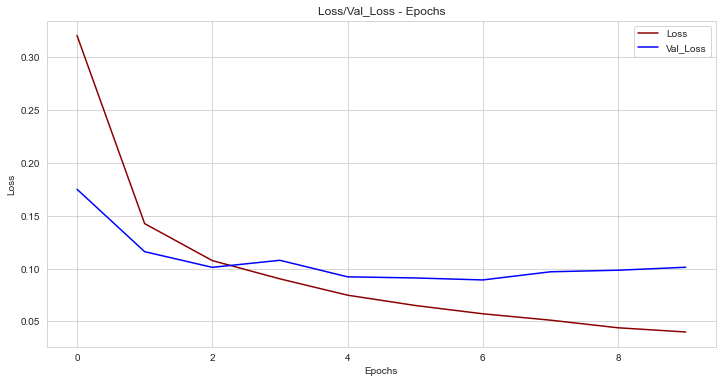

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.97      0.97       982
           5       0.95      0.98      0.97       892
           6       0.98      0.97      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.95      0.96      0.96       974
           9       0.97      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de Confusão: 



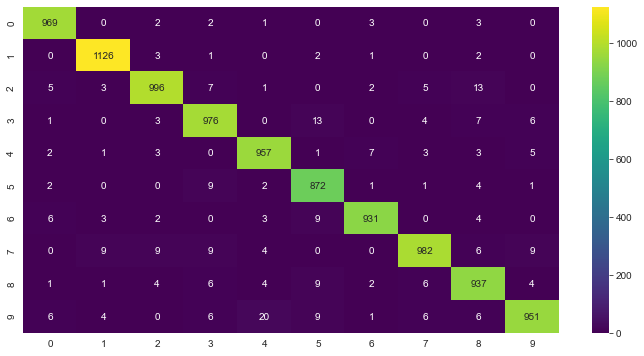

In [ ]:
y_pred = np.argmax(model.predict(images_test.reshape(images_test.shape[0],28*28)), axis=1)
y_test = np.argmax(labels_test, axis=1)

print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d", cmap='viridis')
plt.show()

### Rede Convolucional

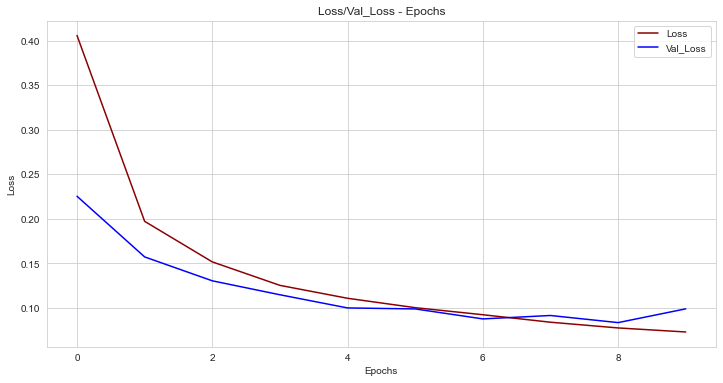

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history_.history['loss'], color='darkred', label='Loss')
plt.plot(history_.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.99      0.96      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.91      0.98      0.94       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Matriz de Confusão: 



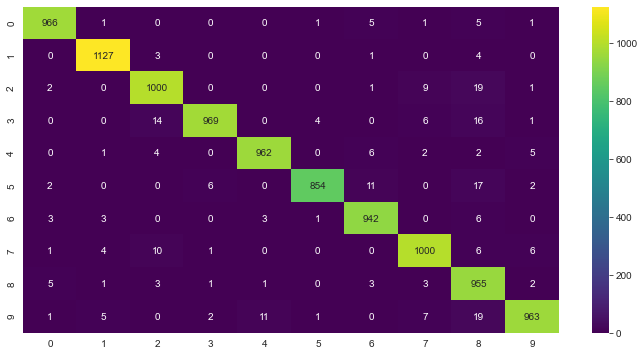

In [ ]:
y_pred_ = np.argmax(model_.predict(images_test), axis=1)

print('Reporte: \n')
print(classification_report(y_test,y_pred_))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_), annot=True,fmt="d", cmap='viridis')
plt.show()

### Imagens classificadas incorretamente

In [ ]:
indices = []

for i in range(len(y_pred)):
    if y_pred[i]!=y_pred_[i]:
        indices.append(i)

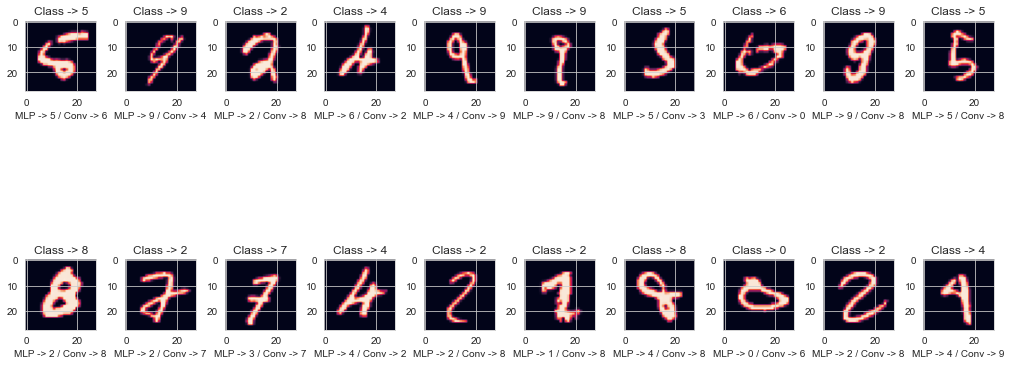

In [ ]:
rows = 2
cols = 10
axes = []
fig = plt.figure(figsize=(14,8))
a = 0

for i in indices[:rows*cols]:

    axes.append( fig.add_subplot(rows, cols, a+1) )

    subplot_title = ("Class -> "+str(labels_test[i][0]))
    axes[-1].set_title(subplot_title)

    x_label = ("MLP -> "+str(y_pred[i])+" / "+"Conv -> "+str(y_pred_[i]))
    axes[-1].set_xlabel(x_label)

    a = a + 1

    plt.imshow(images_test.reshape(images_test.shape[0],28,28,1)[i])


fig.tight_layout()

## Questão 07

$\hspace{0.5cm}$Implemente uma CNN para resolver o problema de classificação de objetos em imagens
utilizando a base de dados CIFAR-10, disponível: <a href="https://www.cs.toronto.edu/~kriz/cifar.html"> CIFAR-10 </a></p>

$\hspace{0.5cm}$Apresente também a curva do erro médio e a matriz de confusão do modelo treinado.

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return dic

In [ ]:
def change(images):
    raw = np.array(images, dtype = float) / 255.0
    images = raw.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])

    return images

def load(arquivo):
    data = unpickle(arquivo)
    images_array = data[b'data']

    images = change(images_array)
    labels = np.array(data[b'labels'])

    return images, labels

def test():
    images, labels = load('/content/drive/My Drive/cifar-10-batches-py/test_batch')

    return images, labels, np_utils.to_categorical(labels,10)

def train():
    images = np.zeros(shape=[50000, 32, 32, 3], dtype = float)
    labels = np.zeros(shape=[50000], dtype = int)

    inicio = 0

    for i in range(5):

        images_batch, labels_batch = load(f'/content/drive/My Drive/cifar-10-batches-py/data_batch_{i+1}')

        final = inicio + 10000

        images[inicio:final,:] = images_batch
        labels[inicio:final] = labels_batch

        inicio = final

    return images, labels, np_utils.to_categorical(labels,10)


images_train, labels_train, class_train = train()
images_test, labels_test, class_test = test()

In [ ]:
data = unpickle(f'/content/drive/My Drive/cifar-10-batches-py/batches.meta')

In [ ]:
data[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [ ]:
name_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

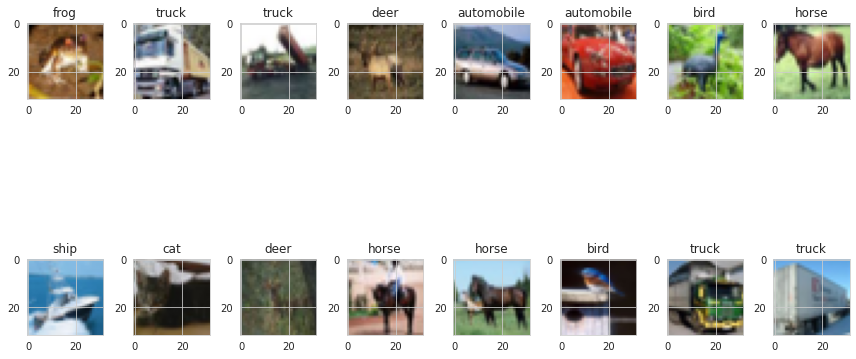

In [ ]:
rows = 2
cols = 8
axes = []
fig = plt.figure(figsize=(12,8))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title = (str(name_labels[labels_train[a]]))
    axes[-1].set_title(subplot_title)
    plt.imshow(images_train[a])


fig.tight_layout()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(96, (3,3), padding='same', input_shape=(32,32,3), activation='relu'), ## padding com zeros
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu'),
    tf.keras.layers.Conv2D(96, (3,3), padding='same',  activation='relu', strides=2), ## 2 passos
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu', strides=2),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Conv2D(192, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(192, (1,1), padding='valid', activation='relu'), ## no padding
    tf.keras.layers.Conv2D(10, (1,1), padding='valid', activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),

    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [ ]:
history = model.fit(images_train, class_train, epochs=100, batch_size=128,validation_data=(images_test,class_test))

Epoch 1/100
391/391 [==============================] - 82s 128ms/step - loss: 2.0965 - accuracy: 0.2218 - val_loss: 1.8545 - val_accuracy: 0.3284
Epoch 2/100
391/391 [==============================] - 48s 124ms/step - loss: 1.7715 - accuracy: 0.3508 - val_loss: 1.6548 - val_accuracy: 0.3929
Epoch 3/100
391/391 [==============================] - 48s 124ms/step - loss: 1.6230 - accuracy: 0.4024 - val_loss: 1.5412 - val_accuracy: 0.4406
Epoch 4/100
391/391 [==============================] - 48s 124ms/step - loss: 1.5371 - accuracy: 0.4359 - val_loss: 1.4628 - val_accuracy: 0.4682
Epoch 5/100
391/391 [==============================] - 48s 124ms/step - loss: 1.4791 - accuracy: 0.4593 - val_loss: 1.4035 - val_accuracy: 0.4911
Epoch 6/100
391/391 [==============================] - 48s 124ms/step - loss: 1.4228 - accuracy: 0.4801 - val_loss: 1.3793 - val_accuracy: 0.5033
Epoch 7/100
391/391 [==============================] - 48s 124ms/step - loss: 1.3798 - accuracy: 0.4976 - val_loss: 1.3578 -

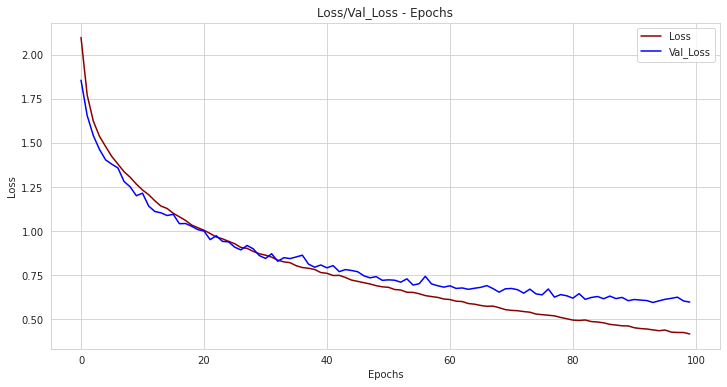

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Loss/Val_Loss - Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'], color='darkred', label='Loss')
plt.plot(history.history['val_loss'], color='blue', label='Val_Loss')
plt.legend(loc='best')
plt.show()

Reporte: 

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1000
           1       0.91      0.91      0.91      1000
           2       0.73      0.73      0.73      1000
           3       0.57      0.73      0.64      1000
           4       0.80      0.75      0.78      1000
           5       0.80      0.62      0.70      1000
           6       0.85      0.82      0.84      1000
           7       0.85      0.82      0.83      1000
           8       0.89      0.90      0.90      1000
           9       0.87      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000


Matriz de Confusão: 



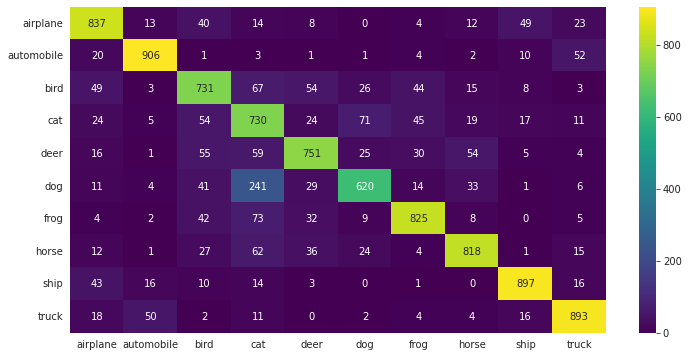

In [ ]:
y_pred = np.argmax(model.predict(images_test), axis=1)
y_test = np.argmax(class_test,axis=1)

print('Reporte: \n')
print(classification_report(y_test,y_pred))
print('\nMatriz de Confusão: \n')
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,fmt="d", cmap='viridis', xticklabels=name_labels, yticklabels=name_labels)
plt.show()